<a href="https://colab.research.google.com/github/sadikatanzila/Applied_Bioinformatics/blob/main/Applied_Bioinformatics_Sadika.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#Applied bioinformatics

This notebook has code for every lecture in the applied bioinformatics course held at TU Dresden. Enjoy!


#print_d: Run this before all other scripts.

This is a supplementary file, which provides methods to print dynamic programming matrices. Execute it once by clicking on the play button to the left, so that it is available for all the other code. Then go  to the other example codes and run them.

In [1]:
# print_d

from tabulate import tabulate
import matplotlib.pyplot as plt

#############################################################
#
# Code for pretty printing of d and db
#
# print_d is the main function.
#
#############################################################

def print_d(**kwargs):
  """
  prints the matrix d in dynamic programming.
  Assumes variables d, a, b, m, n, and optionally db.
  Optional parameters:
  - path (one, all, local) to print backtracking path(s).
  - local is a tuple (i,j) where the matrix had a maximal score.
    path=local has to be set for this option.
  - style (str, png) to print as text or image with color.
  - edu (all, init, main, result, ij) to highlight some cells.
  """
  path = kwargs.get("path", None)
  local = kwargs.get("local", None)
  style = kwargs.get("style", None)
  edu = kwargs.get("edu", None)
  d_del_ins = kwargs.get("d_del_ins", None)
  if d_del_ins:
    name_d = d_del_ins
  else:
    name_d = "d"

  if not d:
    print("Matrix d must be defined to use print_d.")
    return

  if path and db:
    if path=="all": paths = getPaths(m,n)
    elif path=="one": paths=getPaths(m,n)[:1]
    elif path=="local":
      (k,l) = local
      paths = getPaths(k,l)
    for p in paths:
      print("\n\nMatrix %s for alignment\n%s\n\n"%(name_d,path2str(p)))
      if style == "str":
        print("%s\n\n"%(d2str(path=p, d_del_ins = d_del_ins))) 
      else:
        d2png(path=p, d_del_ins = d_del_ins)
  else:
    print("\n\nMatrix %s\n"%(name_d))
    if style == "str":
      print("%s\n\n"%(d2str(d_del_ins = d_del_ins))) 
    else:
      d2png(d_del_ins = d_del_ins)

  if edu:
    if edu=="all":
      d2png(edu="init",d_del_ins = d_del_ins) # d and db as pretty picture with color
      d2png(edu="main",d_del_ins = d_del_ins) # d and db as pretty picture with color
      d2png(edu="result",d_del_ins = d_del_ins) # d and db as pretty picture with color
      d2png(edu="ij",d_del_ins = d_del_ins) # d and db as pretty picture with color
    else:
      d2png(edu=edu,d_del_ins = d_del_ins)




#############################################################
#
# Code for pretty printing of d and db
#
#############################################################

def str_ij(i,j, **kwargs): 
  """returns the contents of cell i,j in d and d_b 
  as a string"""
  style = kwargs.get("style", None)
  d_del_ins = kwargs.get("d_del_ins", None)
  if style == "plain":
    d2s = {"N":"^", "W":"<", "NW":"\\"}
  else:
    d2s = {"N":"\u2191", "W":"\u2190", "NW":"\u2196"}
  direction = ""
  if db and (i,j) in db:
    direction = "".join([d2s[x] for x in db[i,j]])+" "
  label = ""
  if d_del_ins:
    if d_del_ins=="d_ins" and d_ins and (i,j) in d_ins:
      label = str(d_ins[i,j])
    elif d_del_ins=="d_del" and d_del and (i,j) in d_del:
      label = str(d_del[i,j])
  else:
    label = str(d[i,j])
  return direction+label



#############################################################
#
# Convert matrix d into a string
#
#############################################################

def d2str(**kwargs):
  """
  returns the matrix d and d_b as string.
  String b is printed as first row and string a as first column.
  i, j iterate through all cells in d and d_b and store
  the cell contents in the list rows.
  Rows is then given as parameter to tabulate, which
  does the layout as a table. Tabulate has many options
  to refine the layout of the table further.
  **kwargs is optionally used to pass a path through the matrix.
  """
  path = kwargs.get("path", None)
  d_del_ins = kwargs.get("d_del_ins", None)
  rows = [list("  "+b)]
  for i in range(0,m+1):
    row = [(" "+a)[i]]
    for j in range(0,n+1):
      if d_del_ins:
        s = str_ij(i,j,style="plain",d_del_ins=d_del_ins)
      else:
        s = str_ij(i,j, style="plain")
      if path and (i,j) in path: s = "* "+s
      row.append(s)
    rows.append(row)
  return tabulate(rows, tablefmt="plain", stralign="right")



#############################################################
#
# Print d as an image with matplotlib
#
#############################################################

def d2png(**kwargs):
  path = kwargs.get("path", None)
  edu = kwargs.get("edu", None)    
  d_del_ins = kwargs.get("d_del_ins", None)

  fig, ax = plt.subplots()
  columns = list("  "+b)
  colors = [list("w"*(n+2)) for i in range(m+1)]
  cell_text = [list(" "*(n+2)) for i in range(m+1)]
  for i in range(m+1):
    for j in range(n+1):
        if (i,j) in d:
          if d_del_ins:
            s = str_ij(i,j,d_del_ins=d_del_ins)
          else:
            s = str_ij(i,j)
          cell_text[i][j+1] = s
  the_table = ax.table(cellText=cell_text,
                       cellColours=colors,
                       colLabels=columns,
                       cellLoc='right',
                       loc='center')
  for i in range(m+2): 
    for j in range(n+2):    
      the_table[i,j].set_edgecolor("#A9A9A9")
      the_table[i,j].get_text().set_color("#696969")
      the_table[i,j].set_height(0.2)
      the_table[i,j].set_width(0.2)
  # first row
  for j in range(n+2):    
    the_table[0,j].set_facecolor("#DCDCDC")
    the_table[0,j].get_text().set_color("#000000")
    the_table[0,j].loc="center"
  # first column with centered characters in black on grey background
  for i in range(m+2):    
    the_table[i,0].get_text().set_text(list("  "+a)[i])
    the_table[i,0].loc="center"
    the_table[i,0].set_facecolor("#DCDCDC")
    the_table[i,0].get_text().set_color("#000000")
  # backtracking path
  if path:
    for (i,j) in path:
      the_table[i+1,j+1].get_text().set_color("#000000")
      the_table[i+1,j+1].set_facecolor("#56b5fd")

  if edu and edu=="init":
    for i in range(1,m+2):    
      the_table[i,1].set_facecolor("r")
    for j in range(2,n+2):    
      the_table[1,j].set_facecolor("r")

  if edu and edu=="main":
    for i in range(2,m+2):    
      for j in range(2,n+2):    
        the_table[i,j].set_facecolor("r")

  if edu and edu=="result":
    the_table[m+1,n+1].set_facecolor("r")

  if edu and edu=="ij":
    i,j = 3,2
    the_table[i+1,j+1].set_facecolor("r")
    the_table[0,j+1].set_facecolor("r")
    the_table[i+1,0].set_facecolor("r")
    the_table[i,j].set_facecolor("mistyrose")
    the_table[i,j+1].set_facecolor("mistyrose")
    the_table[i+1,j].set_facecolor("mistyrose")

  ax.axis('tight')
  the_table.set_fontsize(12)
  ax.axis('off')
  plt.show()


#############################################################
#
# Get all paths and alignments from the backtracking matrix
#
#############################################################

def getPaths(i,j):
  """
  returns alls paths from bottom right to top left in db.
  """
  #if i+j==0:
  if db[i,j] == set():
    return [[(i,j)]]
  paths = []
  if "N" in db[i,j]:
    paths += getPaths(i-1,j)
  if "W" in db[i,j]:
    paths += getPaths(i,j-1)
  if "NW" in db[i,j]:
    paths += getPaths(i-1,j-1)
  for path in paths:
    path.append((i,j))
  return paths

def path2str(path):
  """prints the alignment corresponding to a given path through the matrix d."""
  (s1,s2) = zip(*path)
  line1 = "  "+"".join([get_char(s1,a,x) for x in range(1,len(s1))])
  line2 = "  "+"".join([get_char(s2,b,x) for x in range(1,len(s2))])
  return "%s\n%s"%(line1,line2)

def get_char(s1,a,x):
  if s1[x]==s1[x-1]: 
    return "-"
  return a[s1[x-1]]


#AB02.1 Programming primer: Hello World


In [ ]:
weather ="rainy"
if weather == "rainy":
    bring = "umbrella"
    weather = "cold"
elif weather == "cold":
    bring = "jacket"
else:
    bring = "sunglasses"

print(bring)

umbrella


In [ ]:
weather ="snowy"
if weather == "rainy":
    bring = "umbrella"
    weather = "cold"
elif weather == "cold":
    bring = "jacket"
else:
    bring = "sunglasses"

print(bring)




sunglasses


In [ ]:
repeat = "TATA"
exon = "CGTCGTACG"


print(repeat[3]+exon[1]) 
print("\n")
print(repeat+repeat+repeat+exon)
print("\n")
print(exon.join([repeat, repeat, repeat]))
print("\n")
print(repeat*3+exon)

print("----------------------")
str1 = "PROGRAMMING"
str2 = str1.lower()
str3 = str2.capitalize()
str4 = str3.replace("ing", "er")
print(str4)

print("----------------------")
mydictionary = dict()
mydictionary[1] = 1
mydictionary["1"] = 2
mydictionary["one"] = 4
mydictionary["2"] = 2
mydictionary[5-3] = 4
mydictionary[3] = 5


sum = 0
for k in range(1,4):
    sum += mydictionary[k]

print(sum)

AG


TATATATATATACGTCGTACG


TATACGTCGTACGTATACGTCGTACGTATA


TATATATATATACGTCGTACG
----------------------
Programmer
----------------------
10


In [ ]:
for i in range(1,6):
    print(i)
print("----------------------")
for i in range(1,6):
    print(5)

print("----------------------")
for i in range(1,3):
    for j in range(3,5):
        print(i)
        print(j)
print("----------------------")
i = 0
i = i+1
i += 1

j = 1

print(i,j,min(i,j))
print("----------------------")

i = 5
j = int(i+10/3)


if i == j and i != 5:
    print(j)
elif i == j and not i == 1:
    print(i)
elif i > j:
    print("Bigger")
else:
    print("None")

print("Python Strings Accessing I")
str1 = "PROGRAMMING"
print(str1[4:])

1
2
3
4
5
----------------------
5
5
5
5
5
----------------------
1
3
1
4
2
3
2
4
----------------------
2 1 1
----------------------
None
Python Strings Accessing I
RAMMING


In [ ]:
# AB02.1

# Here is some example code for python

# Use hash tags for comments

# The first programme "hello world"
print("Hello world!")

print("------------------------")

# Variables

s = "This is a string"
i = 2
f = 1.1234
b = True

# And some example uses
print(s, i, f, b, i/f, not b)
print(s[i], s[0], s[0:6], s[-1], s[-17:])

# As we print a lot, there are some convient formatting options
# Use %s %d %f as placeholder for strings, integers, and floats
print("s = %s, i = %d, f = %.2f"%(s,i,f))

print("------------------------")

# Data structures
l = [1,2,3,"green", "acgt", 1.2]
print(l)
print(l[0])
print(l[-1])
print(l[0:4])

# Very useful is something called list comprehension
# It's a combination of lists and loops
l2 = [e for e in l if isinstance(e,int)]
print(l2)
l2 = [e for e in l if isinstance(e,str)]
print(l2)
l2 = [2*e for e in l if isinstance(e,int)]
print(l2)

print("------------------------")

# There are many functions for lists
print(min([1,2,3,4]))
print(sum([1,2,3,4]))
print(len([1,2,3,4]))


print("------------------------")

# Lists can be sorted
print(sorted([5,4,3,7]))

# List can be tuples and can still be sorted
t = ("Michael", 1)
print(t[0])
print(t[1])
l = [("Maria",3), ("Sue",2)]
l.append(t)
print(sorted(l, key = lambda t: t[1]))


print("------------------------")

# Dictionaries are useful data structures

d = {}
d["Michael"] = 180
d["Maria"] = 168
d["Sue"] = 183
print(d["Sue"])
print(list(d.keys()), list(d.values()), list(d.items()))
if not "Pete" in d: print("Pete is not in the dictionary")

print("------------------------")

# A curiosity: Computers are limited no matter how large they are.
# The number 1/3 is 0.3333... for ever. Now look what happens
print(.1 + .1 + .1 == .3)
print( 1 +  1 +  1 ==  3)

Hello world!
------------------------
This is a string 2 1.1234 True 1.7803097739006588 False
i T This i g This is a string
s = This is a string, i = 2, f = 1.12
------------------------
[1, 2, 3, 'green', 'acgt', 1.2]
1
1.2
[1, 2, 3, 'green']
[1, 2, 3]
['green', 'acgt']
[2, 4, 6]
------------------------
1
10
4
------------------------
[3, 4, 5, 7]
Michael
1
[('Michael', 1), ('Sue', 2), ('Maria', 3)]
------------------------
183
['Michael', 'Maria', 'Sue'] [180, 168, 183] [('Michael', 180), ('Maria', 168), ('Sue', 183)]
Pete is not in the dictionary
------------------------
False
True



#AB02.2 Programming primer: Dictiornaries and more
Dictionaries, lists, and set are important data structures. They differ in the time to look up elements. Here you get see the difference. Lists are slower than dictionaries and sets. However, they can order elements, which is often useful. 

In [ ]:
# AB02.2

import time
from tabulate import tabulate

#####################################
#
# Compare the speed for looking up elements in dictionaries, lists, and sets
#
#####################################


# Create a dictionary, list, and set with 100 000 elements.
d={}
l=[]
s=set()

for i in range(100000):
  d[i]=i
  l.append(i)
  s.add(i)

headers = ["Data structure", "Time in s", "Number of look ups","Time per cycle"]
table = []


# Look up -1 in the data structure, which is not in there
def test(name,datastructure, limit):
  start = time.time()
  for i in range(limit):
    if -1 in datastructure: print("-1 is in data structure")
  took = time.time()-start
  return [name, took, limit, took/limit]

table.append(test("Dictionary", d, 10000000))
table.append(test("List",       l,     1000))
table.append(test("Set",        s, 10000000))

print(tabulate(table, headers=headers))

print("\nLists are slower than dictionaries and sets.")

Data structure      Time in s    Number of look ups    Time per cycle
----------------  -----------  --------------------  ----------------
Dictionary           0.437356              10000000       4.37356e-08
List                 0.964043                  1000       0.000964043
Set                  0.381657              10000000       3.81657e-08

Lists are slower than dictionaries and sets.


#AB02.3 Programming primer: The benefits of dynamic programming
Here we have three implementations for the fibonacci numbers, which differ a lot in their runtime behavior.
fib1 is very elegant and uses recursion. fib2 uses dynamic programming instead and is faster.

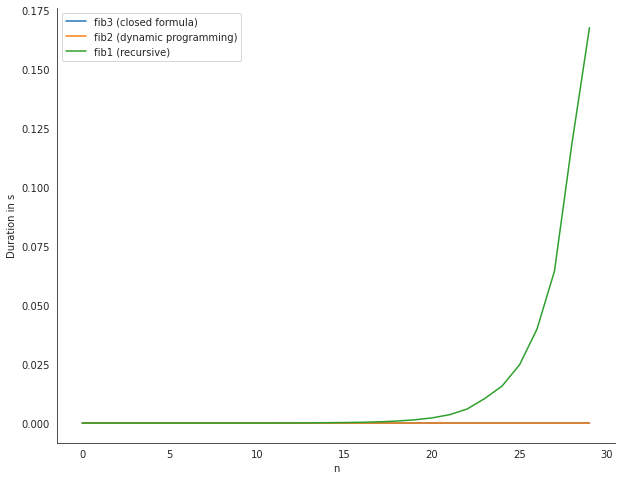

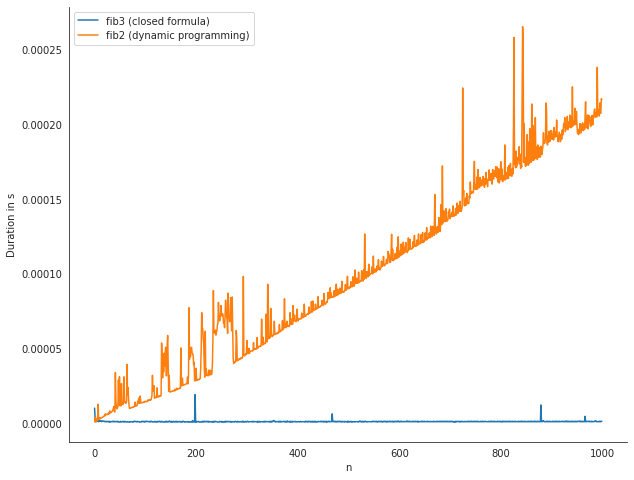

In [ ]:
# AB02.3

import time
import seaborn as sns
import matplotlib.pyplot as plt
import math

# Compute the fibonacci numbers recursively. Very elegant, but slow
def fib1(n):
  if n<2: return n
  return fib1(n-1) + fib1(n-2)


# Compute the fibonacci numbers with dynamic programming (d)
def fib2(n):
  fib={}
  fib[0]=0
  fib[1]=1
  if n<2: return fib[n]
  for i in range(2,n+1):
    fib[i] = fib[i-1]+fib[i-2]
  return fib[n]

# Compute the fibonacci number with a closed formula
def fib3(n):
  return int(1/math.sqrt(5) * ( ((1+math.sqrt(5))/2)**n - ((1-math.sqrt(5))/2)**n ))

def test(m,ns):
  took = []
  for n in ns:
    start = time.time()
    if m==1: f=fib1(n)
    if m==2: f=fib2(n)
    if m==3: f=fib3(n)
    took.append(time.time()-start)
  return took

name={1:"fib1 (recursive)", 2:"fib2 (dynamic programming)", 3:"fib3 (closed formula)"}
sns.set_style("white")
ns=range(30)
for m in [3,2,1]:
    plt.plot(ns, test(m,ns), label=name[m])
sns.despine()
plt.ylabel('Duration in s')
plt.xlabel('n')
plt.legend()
plt.show()

# Dynamic programming vs. closed formula
# The latter is faster, but due to accuracy, it has problems for large n. But up to n=1000 it is fine
# The dynamic programming solution fib2 does not have this problem of number accuracy
ns=range(0,1000,1)
for m in [3,2]:
    plt.plot(ns, test(m,ns), label=name[m])
sns.despine()
plt.ylabel('Duration in s')
plt.xlabel('n')
plt.legend()
plt.show()


#AB02.4 Prgramming Primer: Downloading data

Colab is nice, but it needs data to be fun. You access Google drive or upload files (just google how to do this). Or you simply retrieve data from remote websites. Below we get data from Pfam and PDB. The Pfam data we cache. I.e. if you run the script a second time, it will no longer retrieve the file remotely, but load a local copy. 

In [ ]:
#AB02.4

# Downloading data


import requests # to retrieve data from a url
import os.path  # to check if a file exists

pfam_id = "PF00693" # Herpes thymidine kinase
pdb_id = "1OSN" # The structure of a herpes thymidine kinase

def urlPdbSeq(id):
  return "https://www.rcsb.org/fasta/entry/"+id+"/download"

def getPDBSeq(id):
  print("\n\nDownloading sequence for %s from PDB"%(id))
  r = requests.get( urlPdbSeq(id) ) 
  data = str(r.content, encoding = 'utf-8')
  return data
  
seq = getPDBSeq(pdb_id)
print("\n\nPDB %s has sequence:\n%s\n\n"%(pdb_id, seq))





def url(id): # id e.g. "PF00693"
  """returns the url to retrieve an alignment for Pfam family."""
  return "https://pfam.xfam.org/family/"+id+"/alignment/uniprot/format?format=pfam&alnType=uniprot&order=t&case=l&gaps=dashes&download=0"

def getPfam(id):
  """downloads or loads Pfam alignment given by id. If the alignment exists locally 
  as a file, then just load it. Otherwise get it from the internet and store it in a file
  to avoid retrieval at next run."""
  fn = id+".txt"
  if os.path.exists(fn):
    print("\n\nLoading Pfam alignment %s"%(id))
    f = open(fn)
    data = f.read()
  else:
    print("\n\nDownloading Pfam alignment %s"%(id))
    r = requests.get( url(id) ) 
    data = str(r.content, encoding = 'utf-8')
    f = open(fn, "w")
    f.write(data)
    f.close()   
  rows=[]
  for line in data.split("\n"):
    if line!="":
      seq = line.split()[1]
      rows.append(seq)
  return rows

pfam = getPfam(pfam_id)
print("\n\nPfam %s (%d lines):"%(pfam_id, len(pfam)))
for line in pfam[:7]:
  print(line[:40]+"...")
print("...")





PDB 1OSN has sequence:
>1OSN_1|Chains A,B,C,D|Thymidine kinase|Human herpesvirus 3 (10335)
MSTDKTDVKMGVLRIYLDGAYGIGKTTAAEEFLHHFAITPNRILLIGEPLSYWRNLAGEDAICGIYGTQTRRLNGDVSPEDAQRLTAHFQSLFCSPHAIMHAKISALMDTSTSDLVQVNKEPYKIMLSDRHPIASTICFPLSRYLVGDMSPAALPGLLFTLPAEPPGTNLVVCTVSLPSHLSRVSKRARPGETVNLPFVMVLRNVYIMLINTIIFLKTNNWHAGWNTLSFCNDVFKQKLQKSECIKLREVPGIEDTLFAVLKLPELCGEFGNILPLWAWGMETLSNCLRSMSPFVLSLEQTPQHAAQELKTLLPQMTPANMSSGAWNILKELVNAVQDNTS





Loading Pfam alignment PF00693


Pfam PF00693 (808 lines):
GPHGVGKTTTSAQLMEALGPR-DNI-VYVPEPMTYWQVLG...
----------------------------------------...
GAYGIGKTTAAEEFLHHFAITpNRI-LLIGEPLSYWRNLA...
GAYGIGKTTAAEEFLHHFAITsNRI-LLIGEPLSYWRNLA...
GAYGIGKTTATEEFLHHFAITpNRI-LLIGEPLSYWRNLA...
GAYGIGKTTAAEEFLHHFAITpNRI-LLIGEPLSYWRNLA...
GAYGIGKTTAAEEFLHHFAITpNRI-LLIGEPLSYWRNLA...
...


#AB02.5 Programming Primer: Matplotlib

Matplotlib is a great module for quick generation of nice figures.
A histogram in just one line! There are many parameters that can be set to get it into the shape you want. Very useful for your final year thesis. Also check out seaborn, which build on matplotlib and adds many nice visualisations.

A histogram in one line of code with Matplotlib!


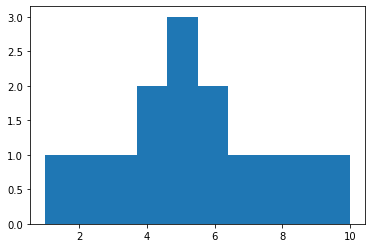


Let's add some labels.


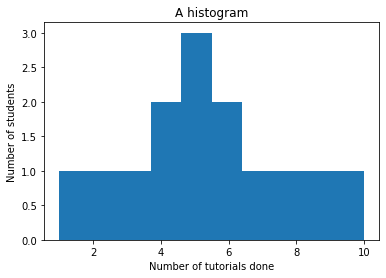

Two data sets in a histogram


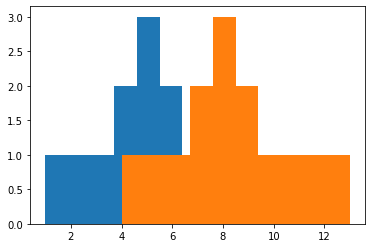

And a plot in Matplotlib


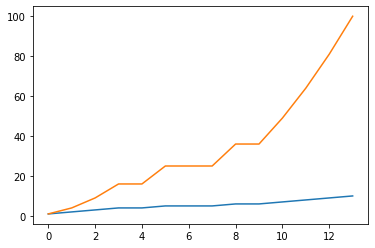

Seaborn is a module which makes Matplotlib a little more beautiful.


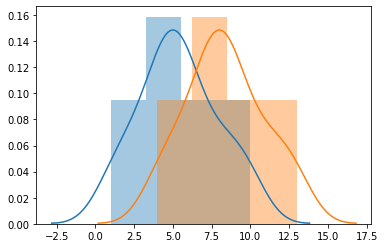

In [ ]:
import matplotlib.pyplot as plt
l= [1,2,3,4,4,5,5,5,6,6,7,8,9,10]
print("A histogram in one line of code with Matplotlib!")
plt.hist(l)
plt.show()

print("\nLet's add some labels.")
plt.hist(l)
plt.title("A histogram")
plt.xlabel("Number of tutorials done")
plt.ylabel("Number of students")
plt.show()


print("Two data sets in a histogram")
l2 = [e+3 for e in l]
plt.hist(l)
plt.hist(l2)
plt.show()

print("And a plot in Matplotlib")
x = range(len(l))
plt.plot(x, l)
plt.plot(x, [e*e for e in l])
plt.show()



import seaborn as sns
print("Seaborn is a module which makes Matplotlib a little more beautiful.")
sns.distplot(l)
sns.distplot(l2)
plt.show()


#AB03.1 Levenshtein distance

The script below computes the Levenshtein distance using a recursive formula.

In [ ]:
#AB03.1

#@title Input strings for Levensthein distance{ display-mode: "both" }
a = "Bob Peter" #@param {type:"string"}
b = "Petra" #@param {type:"string"}

def lev(a,b):
  if len(a) == 0 or len(b) == 0: 
    return len(a)+len(b)
  return min(lev(a[:-1], b)      + 1, 
             lev(a,      b[:-1]) + 1, 
             lev(a[:-1], b[:-1]) + (a[-1]!=b[-1])
            )

print("Levenshtein distance between %s and %s is %d."%(a,b,lev(a,b)))

Levenshtein distance between Bob Peter and Petra is 6.


#AB03.2 Levenshtein distance and the count of necessary plus operations

We are extending the script to count the number of plus operations needed.

In [ ]:
# AB03.2

#@title Input strings for Levensthein distance { display-mode: "both" }
a = "Peter weoi" #@param {type:"string"}
b = "Petra er" #@param {type:"string"}

def lev(a,b):
  if len(a) == 0 or len(b) == 0: 
    return (len(a)+len(b), 1)
  (lev1, ops1) = lev(a[:-1], b)
  (lev2, ops2) = lev(a,      b[:-1]) 
  (lev3, ops3) = lev(a[:-1], b[:-1])
  return (min(lev1+1,lev2+1,lev3+(a[-1]!=b[-1])), ops1+ops2+ops3)
    
import time
(lev4,ops4) = lev(a,b)
print("Levenshtein distance between %s and %s is %d.\nTook %d plus operations."%(a,b,lev4,ops4))

Levenshtein distance between Peter weoi and Petra er is 5.
Took 1256465 plus operations.


#AB03.3 Levenshtein distance in one line and fast

Enjoy the shortest implementation of Levenshtein. And it is fast, too. 
Thanks to a cool Python feature, we can use dynamic programming without implementing it ourselves. Instead, we use a cache for functions. We can ask Python to store function results with the lru_cache keyword.

In a nutshell: Ultra short code, ultra fast.

In [ ]:
# AB03.3
#@title Input strings for Levensthein distance { display-mode: "both" }
a = "Peter M\xFCller" #@param {type:"string"}
b = "Petra Meyer" #@param {type:"string"}

from functools import lru_cache

@lru_cache(maxsize=None)
def l(a,b): return len(b) if not a else len(a) if not b else min(l(a[:-1], b)+1, l(a, b[:-1])+1, l(a[:-1], b[:-1])+(a[-1] != b[-1]))

print("Levenshtein distance with cache between %s and %s is %d."%(a,b,l(a,b)))


Levenshtein distance with cache between Peter Müller and Petra Meyer is 5.


#AB03.4 Levenshtein distance with dynamic programming

Now we use dynamic programming to store intermediate results and avoid recomputation.

# Longest Common Subsequence

Levenshtein distance between ACGCAA and ACCAGA is 5


Matrix d



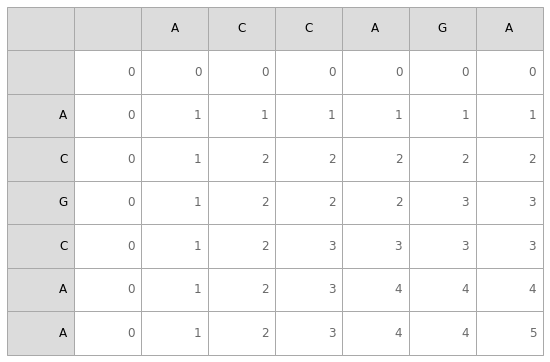

In [ ]:
#AB03.4
#@title Input strings for Levensthein distance { display-mode: "code" }
a = "ACGCAA" #@param {type:"string"}
b = "ACCAGA" #@param {type:"string"}

d={} # The dynamic programming matrix (as a dictionary).
db = None
m = len(a)
n = len(b)

def lev(a,b):
  # Initialise top left cell to zero
  d[0,0] = 0 
  
  # Initialise the first column
  for i in range(1,m+1):
    d[i,0] = 0
    
  # Initialise the first row
  for j in range(1,n+1):
    d[0,j] = 0
    
  # Fill all cells of the matrix
  for i in range(1,m+1):
    for j in range(1,n+1):
      # if letters are the same, no edit operation is used, 
      # otherwise it is one (replace operation)
      if a[i-1] == b[j-1]: 
        s = 1
      else:        
        s = 0
      # Get the minimum of the scores N, W, and NW.
      d[i,j] = max(d[i-1,j  ], 
                   d[i  ,j-1], 
                   d[i-1,j-1]+s)
  return d[m,n]

print("Levenshtein distance between %s and %s is %d"%(a,b,lev(a,b)))

try:
  print_d()
except:
  print("\nError: You have to run the print_d script at the top of the notebook to print the matrix nicely.")

Levenshtein distance between WINTER and WINTERS is 6


Matrix d



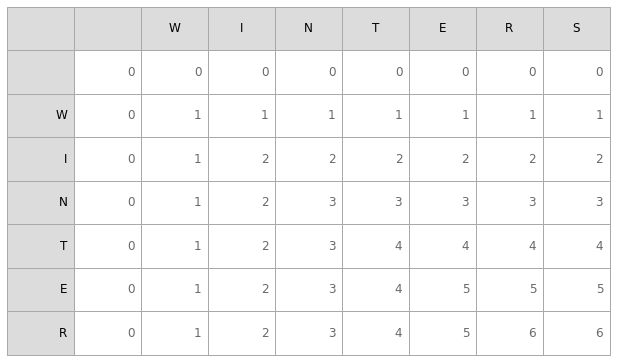

In [ ]:
#AB03.4
#@title Input strings for Levensthein distance { display-mode: "code" }
a = "WINTER" #@param {type:"string"}
b = "WINTERS" #@param {type:"string"}

d={} # The dynamic programming matrix (as a dictionary).
db = None
m = len(a)
n = len(b)

def lev(a,b):
  # Initialise top left cell to zero
  d[0,0] = 0 
  
  # Initialise the first column
  for i in range(1,m+1):
    d[i,0] = 0
    
  # Initialise the first row
  for j in range(1,n+1):
    d[0,j] = 0
    
  # Fill all cells of the matrix
  for i in range(1,m+1):
    for j in range(1,n+1):
      # if letters are the same, no edit operation is used, 
      # otherwise it is one (replace operation)
      if a[i-1] == b[j-1]: 
        s = 1
      else:        
        s = 0
      # Get the minimum of the scores N, W, and NW.
      d[i,j] = max(d[i-1,j  ], 
                   d[i  ,j-1], 
                   d[i-1,j-1]+s)
  return d[m,n]

print("Levenshtein distance between %s and %s is %d"%(a,b,lev(a,b)))

try:
  print_d()
except:
  print("\nError: You have to run the print_d script at the top of the notebook to print the matrix nicely.")

## **Levensthein distance**

Levenshtein distance between ITS and WINTERS is 4


Matrix d



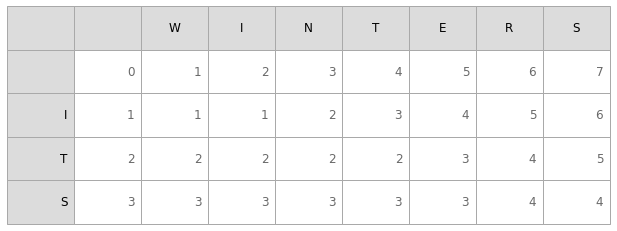

In [ ]:
#AB03.4
#@title Input strings for Levensthein distance { display-mode: "code" }
a = "ITS" #@param {type:"string"}
b = "WINTERS" #@param {type:"string"}

d={} # The dynamic programming matrix (as a dictionary).
db = None
m = len(a)
n = len(b)

def lev(a,b):
  # Initialise top left cell to zero
  d[0,0] = 0 
  
  # Initialise the first column
  for i in range(1,m+1):
    d[i,0] = i
    
  # Initialise the first row
  for j in range(1,n+1):
    d[0,j] = j
    
  # Fill all cells of the matrix
  for i in range(1,m+1):
    for j in range(1,n+1):
      # if letters are the same, no edit operation is used, 
      # otherwise it is one (replace operation)
      if a[i-1] == b[j-1]: 
        s = 0
      else:        
        s = 1
      # Get the minimum of the scores N, W, and NW.
      d[i,j] = min(d[i-1,j  ]+1, 
                   d[i  ,j-1]+1, 
                   d[i-1,j-1]+s)
  return d[m,n]

print("Levenshtein distance between %s and %s is %d"%(a,b,lev(a,b)))

try:
  print_d()
except:
  print("\nError: You have to run the print_d script at the top of the notebook to print the matrix nicely.")

# **Longest Common Subsequence with direction**

Dynamic programming to compute the Levenshtein distance of two strings.

ACGC and ACCAGA have the Levenshtein distance 3.
One alignment is:
A A
- C
C C
- A
G G
C A


Matrix d for alignment
  AC--G-C
  ACCAGA-




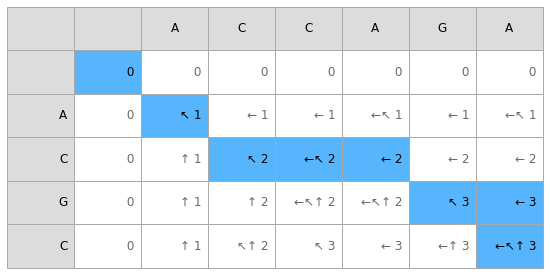



Matrix d for alignment
  A-C-G-C
  ACCAGA-




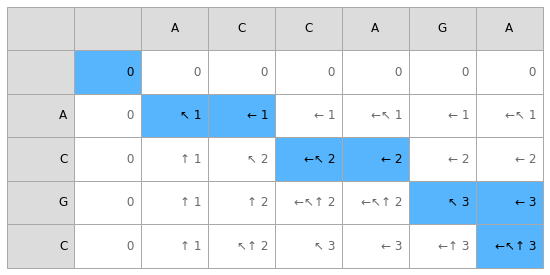



Matrix d for alignment
  AC--GC-
  ACCAG-A




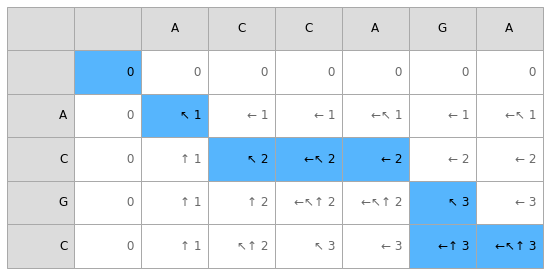



Matrix d for alignment
  A-C-GC-
  ACCAG-A




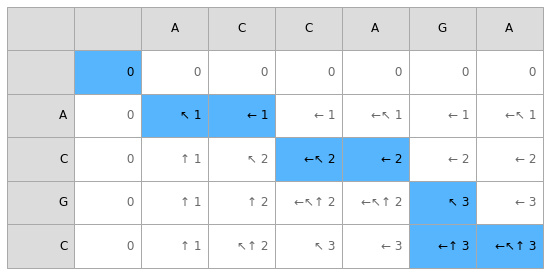



Matrix d for alignment
  ACGC---
  AC-CAGA




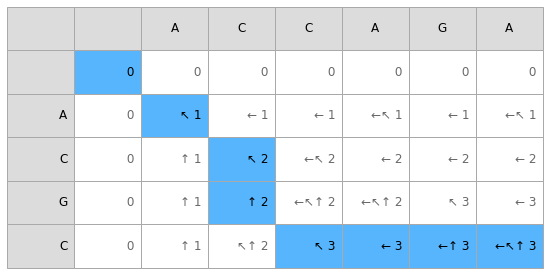



Matrix d for alignment
  AC--GC
  ACCAGA




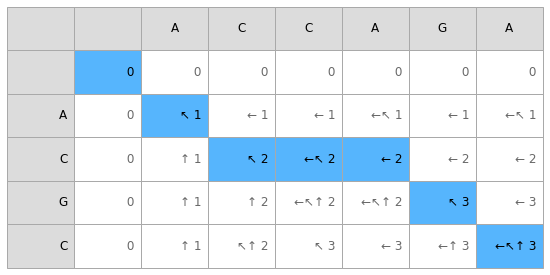



Matrix d for alignment
  A-C-GC
  ACCAGA




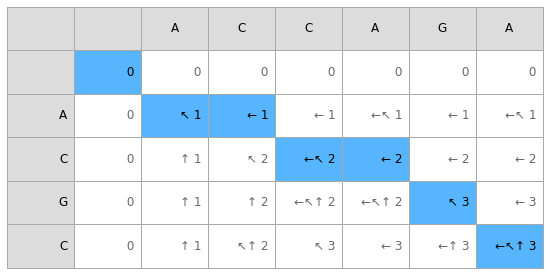

In [ ]:
# AB04.1

#@title Input strings for Levensthein distance { display-mode: "both" }
a = "ACGC" #@param {type:"string"}
b = "ACCAGA" #@param {type:"string"}
m = len(a)
n = len(b)
d={}  # we store the dynamic programming matrix in a dictionary
db={} # and the backtracking matrix, too.

def min_dir(dN,dW,dNW):
  """Returns the minimum of dN, dW, dNW and a set with the directions N, W, NW, which held the minimal value.
  E.g. min_dir(2,2,3) return {"N","W"} and min_dir(3,2,1) {"NW"}.
  """
  direction = set([]) # empty set
  if dN == max(dN,dW,dNW):
    direction.add("N")
  if dW == max(dN,dW,dNW):
    direction.add("W")
  if dNW == max(dN,dW,dNW):
    direction.add("NW")
  return (max(dN,dW,dNW), direction)

def lev(a,b):
  """Computes the Levenshtein distance (and backtracking matrix) between strings a and b.""" 
  d[0,0] = 0 
  db[0,0] = set([]) # empty set
  
  # Initialise the first column
  for i in range(1,m+1):
    d[i,0] = 0
    db[i,0] = set([])
    
  # Initialise the first row
  for j in range(1,n+1):
    d[0,j] = 0
    db[0,j] = set([])
    
  # Fill all cells of the matrix
  for i in range(1,m+1):
    for j in range(1,n+1):
      # if letters are the same, no edit operation is used, otherwise it is one (replace operation)
      if a[i-1] == b[j-1]: 
        s = 1
      else:        
        s = 0
      # Get the minimum of the scores N, W, and NW and remember the direction.
      (d[i,j], db[i,j]) = min_dir(d[i-1,j  ], 
                                  d[i  ,j-1], 
                                  d[i-1,j-1]+s)
  return d[m,n]


def print_lev(a,b,i,j):
  if "NW" in db[i,j]:
    print_lev(a,b,i-1,j-1)
    print(a[i-1], b[j-1])    # print a match or replace
  elif "W" in db[i,j]:
    print_lev(a,b,i  ,j-1)
    print("-",    b[j-1])    # print an insert/delete
  elif "N" in db[i,j]:
    print_lev(a,b,i-1,j)
    print(a[i-1], "-")       # print an insert/delete


print("Dynamic programming to compute the Levenshtein distance of two strings.\n")

print("%s and %s have the Levenshtein distance %d."%(a,b,lev(a,b)))
print("One alignment is:")
print_lev(a,b,len(a),len(b))

try:
  print_d(path="all")
except:
  print("\nError: You have to run the print_d script at the top of the notebook to print the matrix nicely.")

#AB03.5 Levenshtein distance with dynamic programming and counting plus operations

Now we do the same as for the recursive piece of code. We count the number of plus operations needed.
You will be surprised (or not ;-).

In [ ]:
#AB03.5

#@title Input strings for Levensthein distance { display-mode: "both" }
a = "Peter sass im Garten und ass einen Apfel, da kam Maria durch das Gartentor und sang froehlich ein Lied." #@param {type:"string"}
b = "Peter sass im Auto und ass einen Marsriegel, da kam Maria auf dem Rad daher und sang froehlich ein Lied." #@param {type:"string"}

d={} # The dynamic programming matrix (as a dictionary).

def lev(a,b):
  # Initialise number of plus operations needed
  ops = 0
  
  # Initialise top left cell to zero
  d[0,0] = 0 
  
  # Initialise the first column
  m = len(a)
  for i in range(1,m+1):
    d[i,0] = i
    ops += 1
    
  # Initialise the first row
  n = len(b)
  for j in range(1,n+1):
    d[0,j] = j
    ops += 1
    
  # Fill all cells of the matrix
  for i in range(1,m+1):
    for j in range(1,n+1):
      # if letters are the same, no edit operation is used, 
      # otherwise it is one (replace operation)
      if a[i-1] == b[j-1]: 
        s = 0
      else:        
        s = 1
      # Get the minimum of the scores N, W, and NW.
      d[i,j] = min(d[i-1,j  ]+1, 
                   d[i  ,j-1]+1, 
                   d[i-1,j-1]+s)
      ops += 3 # In the three lines above we used three plus ops
  return (d[m,n], ops)

(lev1,ops1) = lev(a,b)

print("Levenshtein distance between %s and %s is %d.\nTook %d plus operations."%(a,b,lev1,ops1))

Levenshtein distance between Peter sass im Garten und ass einen Apfel, da kam Maria durch das Gartentor und sang froehlich ein Lied. and Peter sass im Auto und ass einen Marsriegel, da kam Maria auf dem Rad daher und sang froehlich ein Lied. is 26.
Took 32343 plus operations.


Dynamic programming to compute the Levenshtein distance of two strings.

ACGCAA and ACCAGA have the Levenshtein distance 2.
One alignment is:
A A
C C
G -
C C
A A
- G
A A


Matrix d for alignment
  ACGCA-A
  AC-CAGA




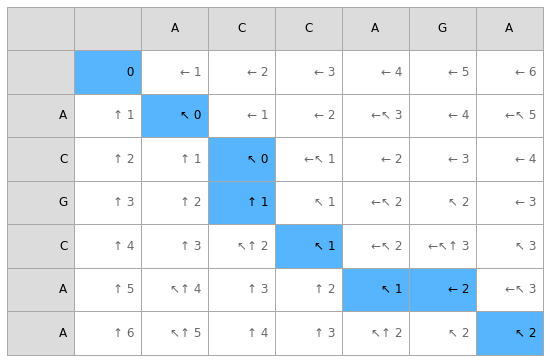

In [ ]:
# AB04.1

#@title Input strings for Levensthein distance { display-mode: "both" }
a = "ACGCAA" #@param {type:"string"}
b = "ACCAGA" #@param {type:"string"}
m = len(a)
n = len(b)
d={}  # we store the dynamic programming matrix in a dictionary
db={} # and the backtracking matrix, too.

def min_dir(dN,dW,dNW):
  """Returns the minimum of dN, dW, dNW and a set with the directions N, W, NW, which held the minimal value.
  E.g. min_dir(2,2,3) return {"N","W"} and min_dir(3,2,1) {"NW"}.
  """
  direction = set([]) # empty set
  if dN == min(dN,dW,dNW):
    direction.add("N")
  if dW == min(dN,dW,dNW):
    direction.add("W")
  if dNW == min(dN,dW,dNW):
    direction.add("NW")
  return (min(dN,dW,dNW), direction)

def lev(a,b):
  """Computes the Levenshtein distance (and backtracking matrix) between strings a and b.""" 
  d[0,0] = 0 
  db[0,0] = set([]) # empty set
  
  # Initialise the first column
  for i in range(1,m+1):
    d[i,0] = i
    db[i,0] = {"N"}
    
  # Initialise the first row
  for j in range(1,n+1):
    d[0,j] = j
    db[0,j] = {"W"}
    
  # Fill all cells of the matrix
  for i in range(1,m+1):
    for j in range(1,n+1):
      # if letters are the same, no edit operation is used, otherwise it is one (replace operation)
      if a[i-1] == b[j-1]: 
        s = 0
      else:        
        s = 1
      # Get the minimum of the scores N, W, and NW and remember the direction.
      (d[i,j], db[i,j]) = min_dir(d[i-1,j  ]+1, 
                                  d[i  ,j-1]+1, 
                                  d[i-1,j-1]+s)
  return d[m,n]


def print_lev(a,b,i,j):
  if "NW" in db[i,j]:
    print_lev(a,b,i-1,j-1)
    print(a[i-1], b[j-1])    # print a match or replace
  elif "W" in db[i,j]:
    print_lev(a,b,i  ,j-1)
    print("-",    b[j-1])    # print an insert/delete
  elif "N" in db[i,j]:
    print_lev(a,b,i-1,j)
    print(a[i-1], "-")       # print an insert/delete


print("Dynamic programming to compute the Levenshtein distance of two strings.\n")

print("%s and %s have the Levenshtein distance %d."%(a,b,lev(a,b)))
print("One alignment is:")
print_lev(a,b,len(a),len(b))

try:
  print_d(path="all")
except:
  print("\nError: You have to run the print_d script at the top of the notebook to print the matrix nicely.")

#AB04.1 Levenshtein distance and alignment with dynamic programming

We know how to compute the Levenshtein distance fast (or better, it has complexity O(n * m) for two input strings of lengths n and m, respectively.)
Now we want to get an alignment. We have to extend the code to record the direction, where the minimal value was found. To do this, we introduce
a second matrix db (it is called db to reflect that it is related to the dynamic programming matrix d and that we will use it for backtracking.). Since, the minimal
value can be found in more than oen direction, the entries of db have to be sets of directions, rather than single directions. The empty set is set([]), which
is a bit cumbersome to write. Unfortunately, python could not use {}, as this is already in place for an empty dictionary. We can add elements to a set using
the command "add" and we can check whether an element is in a set with the command "in". The function print_lev prints the alignment. Please note, that it uses
the variable db, which is a global variable visible throughout the whole programme.

Dynamic programming to compute the Levenshtein distance of two strings.

Petra and Peter have the Levenshtein distance 2.
One alignment is:
P P
e e
t t
r e
a r


Matrix d for alignment
  Pet-ra
  Peter-




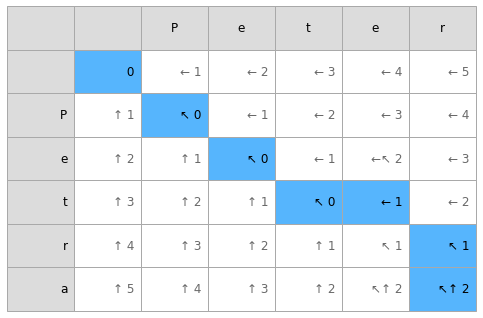



Matrix d for alignment
  Petra
  Peter




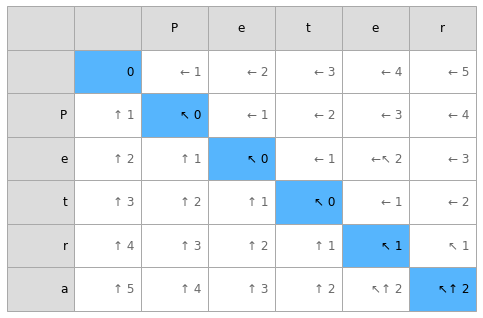

In [ ]:
# AB04.1

#@title Input strings for Levensthein distance { display-mode: "both" }
a = "Petra" #@param {type:"string"}
b = "Peter" #@param {type:"string"}
m = len(a)
n = len(b)
d={}  # we store the dynamic programming matrix in a dictionary
db={} # and the backtracking matrix, too.

def min_dir(dN,dW,dNW):
  """Returns the minimum of dN, dW, dNW and a set with the directions N, W, NW, which held the minimal value.
  E.g. min_dir(2,2,3) return {"N","W"} and min_dir(3,2,1) {"NW"}.
  """
  direction = set([]) # empty set
  if dN == min(dN,dW,dNW):
    direction.add("N")
  if dW == min(dN,dW,dNW):
    direction.add("W")
  if dNW == min(dN,dW,dNW):
    direction.add("NW")
  return (min(dN,dW,dNW), direction)

def lev(a,b):
  """Computes the Levenshtein distance (and backtracking matrix) between strings a and b.""" 
  d[0,0] = 0 
  db[0,0] = set([]) # empty set
  
  # Initialise the first column
  for i in range(1,m+1):
    d[i,0] = i
    db[i,0] = {"N"}
    
  # Initialise the first row
  for j in range(1,n+1):
    d[0,j] = j
    db[0,j] = {"W"}
    
  # Fill all cells of the matrix
  for i in range(1,m+1):
    for j in range(1,n+1):
      # if letters are the same, no edit operation is used, otherwise it is one (replace operation)
      if a[i-1] == b[j-1]: 
        s = 0
      else:        
        s = 1
      # Get the minimum of the scores N, W, and NW and remember the direction.
      (d[i,j], db[i,j]) = min_dir(d[i-1,j  ]+1, 
                                  d[i  ,j-1]+1, 
                                  d[i-1,j-1]+s)
  return d[m,n]


def print_lev(a,b,i,j):
  if "NW" in db[i,j]:
    print_lev(a,b,i-1,j-1)
    print(a[i-1], b[j-1])    # print a match or replace
  elif "W" in db[i,j]:
    print_lev(a,b,i  ,j-1)
    print("-",    b[j-1])    # print an insert/delete
  elif "N" in db[i,j]:
    print_lev(a,b,i-1,j)
    print(a[i-1], "-")       # print an insert/delete


print("Dynamic programming to compute the Levenshtein distance of two strings.\n")

print("%s and %s have the Levenshtein distance %d."%(a,b,lev(a,b)))
print("One alignment is:")
print_lev(a,b,len(a),len(b))

try:
  print_d(path="all")
except:
  print("\nError: You have to run the print_d script at the top of the notebook to print the matrix nicely.")


#AB04.2 Levenshtein distance and all alignments with dynamic programming

To print all alignments, we only have to change the print_lev function. The rest of the code stays the same. 
In print_lev, instead of printing match, replace, insertion/deletion directly,
we add this output to two strings (line1 and line2), which we pass recursively. And most important, instead of pursuing directions
exclusively as done above (if, elif, elif), we go for all possibilities (if, if, if).

Dynamic programming to compute the Levenshtein distance of two strings.

Pete and Petra have the Levenshtein distance 2.
All alignments:

Pete-
Petra

Pet-e
Petra


Matrix d for alignment
  Pete-
  Petra




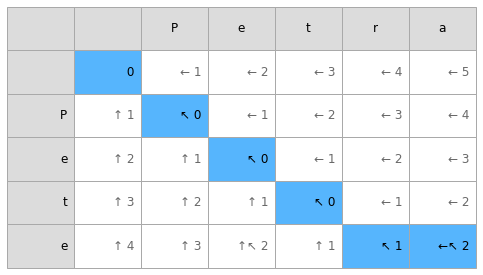



Matrix d for alignment
  Pet-e
  Petra




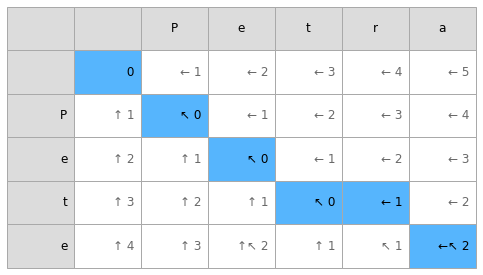

In [ ]:
# AB04.2

#@title Input strings for Levensthein distance { display-mode: "both" }
a = "Pete" #@param {type:"string"}
b = "Petra" #@param {type:"string"}
m = len(a)
n = len(b)
d={}  # we store the dynamic programming matrix in a dictionary
db={} # and the backtracking matrix, too.


def min_dir(dN,dW,dNW):
  """Returns the minimum of dN, dW, dNW and a set with the directions N, W, NW, which held the minimal value.
  min_dir(2,2,3) return {"N","W"} and min_dir(3,2,1) {"NW"}.
  """
  direction = set([]) # empty set
  if dN == min(dN,dW,dNW):
    direction.add("N")
  if dW == min(dN,dW,dNW):
    direction.add("W")
  if dNW == min(dN,dW,dNW):
    direction.add("NW")
  return (min(dN,dW,dNW), direction)



def lev(a,b):
  """Computes the Levenshtein distance (and backtracking matrix) between strings a and b.""" 
  d[0,0] = 0 
  db[0,0] = set([]) # empty set
  
  # Initialise the first column
  for i in range(1,m+1):
    d[i,0] = i
    db[i,0] = {"N"}
    
  # Initialise the first row
  for j in range(1,n+1):
    d[0,j] = j
    db[0,j] = {"W"}
    
  # Fill all cells of the matrix
  for i in range(1,m+1):
    for j in range(1,n+1):
      # if letters are the same, no edit operation is used, otherwise it is one (replace operation)
      if a[i-1] == b[j-1]: 
        s = 0
      else:        
        s = 1
      # Get the minimum of the scores N, W, and NW and remember the direction.
      (d[i,j], db[i,j]) = min_dir(d[i-1,j  ]+1, 
                                  d[i  ,j-1]+1, 
                                  d[i-1,j-1]+s)
  return d[m,n]



def print_lev(a,b, i,j, line1, line2):
  if "N" in db[i,j]:
    print_lev(a,b,i-1,j,   a[i-1]+line1,    "-"+line2)
  if "W" in db[i,j]:
    print_lev(a,b,i  ,j-1,    "-"+line1, b[j-1]+line2)
  if "NW" in db[i,j]:
    print_lev(a,b,i-1,j-1, a[i-1]+line1, b[j-1]+line2)
  if db[i,j]==set([]): # empty set. we have reached the top left corner of db
    print()
    print(line1)       # and have collected the full alignment
    print(line2)   

print("Dynamic programming to compute the Levenshtein distance of two strings.\n")

print("%s and %s have the Levenshtein distance %d."%(a,b,lev(a,b)))
print("All alignments:")
print_lev(a,b,len(a),len(b), "", "")

try:
  print_d(path="all")
except:
  print("\nError: You have to run the print_d script at the top of the notebook to print the matrix nicely.")



#AB05 Needleman-Wunsch algorithm

This algorithm implements global sequence comparison with a scoring scheme for matches, mismatches, and gaps.
It also prints out all alignments. Adapt the scoring scheme to output your favorite alignment.

Dynamic programming matrices for Needleman-Wunsch algorithm.

Score=3


All alignments (match score=2, mismatch score=-1, gap score=-2):

cgg
ccg


Matrix d for alignment
  cgg
  ccg




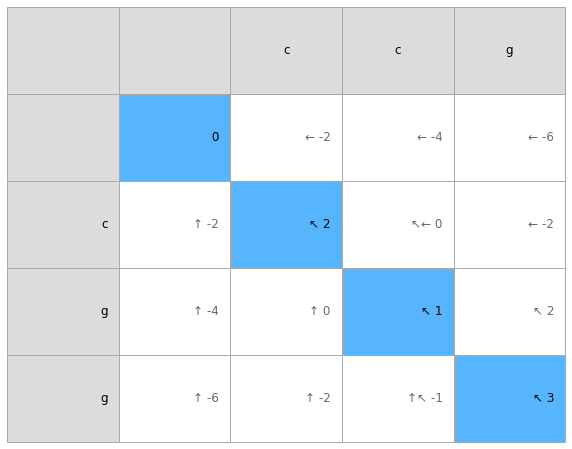

In [6]:
#AB05

#@title Input strings and scoring scheme { display-mode: "both" }
a = "cgg" #@param {type:"string"}
b = "ccg" #@param {type:"string"}
sm =  2#@param {type:"integer"}
sr =  -1#@param {type:"integer"}
sg =  -2#@param {type:"integer"}

m = len(a)
n = len(b)
d={}  # we store the dynamic programming matrix in a dictionary
db={} # and the backtracking matrix, too.


def max_dir(dN,dW,dNW):
  """Returns the maximum of dN, dW, dNW and a set with the directions N, W, NW, which held the maximum value.
  max_dir(4,4,3) return {"N","W"} and miax_dir(3,2,4) {"NW"}.
  """
  direction = set([]) # empty set
  if dN == max(dN,dW,dNW):
    direction.add("N")
  if dW == max(dN,dW,dNW):
    direction.add("W")
  if dNW == max(dN,dW,dNW):
    direction.add("NW")
  return (max(dN,dW,dNW), direction)

def needle(a,b):
  """Computes the Levenshtein distance (and backtracking matrix) between strings a and b.""" 

  d[0,0] = 0 
  db[0,0] = set([]) # empty set
  
  # Initialise the first column
  for i in range(1,m+1):
    d[i,0] = i*sg
    db[i,0] = {"N"}
    
  # Initialise the first row
  for j in range(1,n+1):
    d[0,j] = j*sg
    db[0,j] = {"W"}
    
  # Fill all cells of the matrix
  for i in range(1,m+1):
    for j in range(1,n+1):
      # if letters are the same, no edit operation is used, otherwise it is one (replace operation)
      if a[i-1] == b[j-1]: 
        s = sm
      else:        
        s = sr
      # Get the maximum of the scores N, W, and NW and remember the direction.
      (d[i,j], db[i,j]) = max_dir(d[i-1,j  ]+sg, 
                                  d[i  ,j-1]+sg, 
                                  d[i-1,j-1]+s)
      
  return d[m,n]
  
def align(a,b, i,j, line1, line2):
  """prints all aligments for strings a and b. 
  Requires that needle was run
  (for the db matrix with the direction information)."""
  if "N" in db[i,j]:
    align(a,b,i-1,j,   a[i-1]+line1,    "-"+line2)
  if "W" in db[i,j]:
    align(a,b,i  ,j-1,    "-"+line1, b[j-1]+line2)
  if "NW" in db[i,j]:
    align(a,b,i-1,j-1, a[i-1]+line1, b[j-1]+line2)
  if db[i,j]==set([]): # empty set. we have reached the top left corner of db
    print()
    print(line1)       # and have collected the full alignment
    print(line2)   

def align1(a,b, i,j, line1, line2):
  """prints one aligment for strings a and b. 
  Requires that needle was run
  (for the db matrix with the direction information)."""
  if "N" in db[i,j]:
    align1(a,b,i-1,j,   a[i-1]+line1,    "-"+line2)
  elif "W" in db[i,j]:
    align1(a,b,i  ,j-1,    "-"+line1, b[j-1]+line2)
  elif "NW" in db[i,j]:
    align1(a,b,i-1,j-1, a[i-1]+line1, b[j-1]+line2)
  elif db[i,j]==set([]): # empty set. we have reached the top left corner of db
    print()
    print(line1)       # and have collected the full alignment
    print(line2)   
    
    
print("Dynamic programming matrices for Needleman-Wunsch algorithm.\n")

print("Score=%d"%(needle(a,b)))

print("\n\nAll alignments (match score=%d, mismatch score=%d, gap score=%d):"%(sm,sr,sg))
align(a,b,len(a),len(b), "", "") 
  
try:
  print_d(path="all")
except:
  print("\nError: You have to run the print_d script at the top of the notebook to print the matrix nicely.")


# **Needleman-Wunsch with Dynamic Programming and Printing of Alignment**
Complete the implementation of the print_needle() function for printing the alignment. For the backtracking, favor NW over W over N and print out one alignment only.

In [7]:
def max_dir(d_n, d_w, d_nw):
    direc = set()  # Empty set
    if d_n == max(d_n, d_w, d_nw):
        direc.add('N')
    if d_w == max(d_n, d_w, d_nw):
        direc.add('W')
    if d_nw == max(d_n, d_w, d_nw):
        direc.add('NW')
    return max(d_n, d_w, d_nw), direc


def needle(a, b):
    """
    Needleman-Wunsch algorithm. Iterative implementation.
    :param a: Sequence a
    :param b: Sequence b
    :return: Returns the score of the alignment and the backtracking matrix
    """
    m = len(a)
    n = len(b)

    # Scoring Scheme #
    s_g = -2 # @param {type:"integer"}
    s_r = -1 # @param {type:"integer"}
    s_m = 2 # @param {type:"integer"}

    # let 'd' be the distance matrix of size i+1 x j+1
    # let 'd_b' be the backtracking matrix of size i+1 x j+1

    d = dict()
    d[(0, 0)] = 0

    d_b = dict()
    d_b[(0, 0)] = set()  # Empty set

    for i in range(1, m + 1):
        d[(i, 0)] = i * s_g
        d_b[(i, 0)] = {'N'}
    for j in range(1, n + 1):
        d[(0, j)] = j * s_g
        d_b[(0, j)] = {'W'}

    for i in range(1, m + 1):
        for j in range(1, n + 1):
            if a[i - 1] == b[j - 1]:  # Python count is different (starting at 0 instead of 1)
                s = s_m
            else:
                s = s_r
            d[(i, j)], d_b[(i, j)] = max_dir(d[(i - 1, j)] + s_g,
                                             d[(i, j - 1)] + s_g,
                                             d[(i - 1, j - 1)] + s)

    return d[(i, j)], d_b
 
def print_needle(a, i, b, j, d_b):
    if 'NW' in d_b[(i, j)]:
        print_needle(a,i-1,b,j-1,d_b)
        print(a[i - 1], b[j - 1])
    elif 'W' in d_b[(i, j)]:
        print_needle(a,i,b,j-1,d_b)
        print("-", b[j - 1])
    elif 'N' in d_b[(i, j)]:
        print_needle(a,i-1,b,j,d_b)
        print(a[i - 1], "-")

In [8]:
#@title Input strings for Needleman-Wunsch { display-mode: "both" }
a = "ACGACGGCAAACAG"  # @param {type:"string"}
b = "AGACCCCGCGACGGGG"  # @param {type:"string"}
score, d_b = needle(a, b)
print("Needleman-Wunsch schore of '{}' vs '{}': {}".format(a, b, score))
print_needle(a, len(a), b, len(b), d_b)

Needleman-Wunsch schore of 'ACGACGGCAAACAG' vs 'AGACCCCGCGACGGGG': 3
A A
C -
G G
A A
- C
- C
C C
G C
G G
C C
- G
A A
A C
A G
C G
A G
G G


# **Needleman-Wunsch with Dynamic Programming**
Modify the code for the longest common subsequence to get the a working implementation of the global Needleman-Wunsch algorithm. Use the definition from the lecture. The costs should be as follows:

gap: -1
mismatch/replacement: 0
match: 1

In [ ]:
def max_dir(d_n, d_w, d_nw):
    direc = set()  # Empty set
    if d_n == max(d_n, d_w, d_nw):
        direc.add('N')
    if d_w == max(d_n, d_w, d_nw):
        direc.add('W')
    if d_nw == max(d_n, d_w, d_nw):
        direc.add('NW')
    return max(d_n, d_w, d_nw), direc


def needle(a, b):
    """
    Needleman-Wunsch algorithm. Iterative implementation.
    :param a: Sequence a
    :param b: Sequence b
    :return: Returns the score of the alignment and the backtracking matrix
    """
    m = len(a)
    n = len(b)

    # Scoring Scheme #
    s_g = -1 # gap
    s_r = 0 # mismatch/replacement
    s_m = 1 # match

    # let 'd' be the distance matrix of size i+1 x j+1
    # let 'd_b' be the backtracking matrix of size i+1 x j+1

    d = dict()
    d[(0, 0)] = 0

    d_b = dict()
    d_b[(0, 0)] = set()  # Empty set

    for i in range(1, m + 1):
        d[(i, 0)] = i*s_g
        d_b[(i, 0)] = {'N'}
    for j in range(1, n + 1):
        d[(0, j)] = j*s_g
        d_b[(0, j)] = {'W'}

    for i in range(1, m + 1):
        for j in range(1, n + 1):
            if a[i - 1] == b[j - 1]:  # Python count is different (starting at 0 instead of 1)
                s = s_m
            else:
                s = s_r
            d[(i, j)], d_b[(i, j)] = max_dir(d[(i - 1, j)] + s_g,
                                             d[(i, j - 1)] + s_g,
                                             d[(i - 1, j - 1)] + s)

    return d[(i, j)], d_b

In [ ]:
#@title Input strings for Needleman-Wunsch { display-mode: "both" }
a = "Biergarten"  # @param {type:"string"}
b = "Sternwarte"  # @param {type:"string"}
score, d_b = needle(a, b)
print("Needleman-Wunsch schore of '{}' vs '{}': {}".format(a, b, score))

Needleman-Wunsch schore of 'Biergarten' vs 'Sternwarte': 4


#AB06.1 Generating a substitution matrix

Substitution matrices capture who likely or unlikely a replacement of characters in the string is. The are built on the principle of a log odds ratio, i.e. a ratio that related the absolute amount of substitions in the data to the individual frequencies of the two amino acids. You can easily create your own substition matrix. Use e.g. PFAM to download sequence alignments and then feed them into the log odds calculation. Below, I have copied some random sequences from a PFAM alignment. When you do this yourself, make sure you export gaps as - (an option in PFAM) or adjust the code if you don't. We just cuoff the sequence IDs at the beginning and then go column by column through the data and check all pairwise substitions. We use seaborn to print a heatmap of Blosum and of our own matrix.

BLOSUM45 BLOSUM50 BLOSUM62 BLOSUM80 BLOSUM90 PAM250 PAM30 PAM70 


Substitution matrix MyLogOddsSubsMatrix


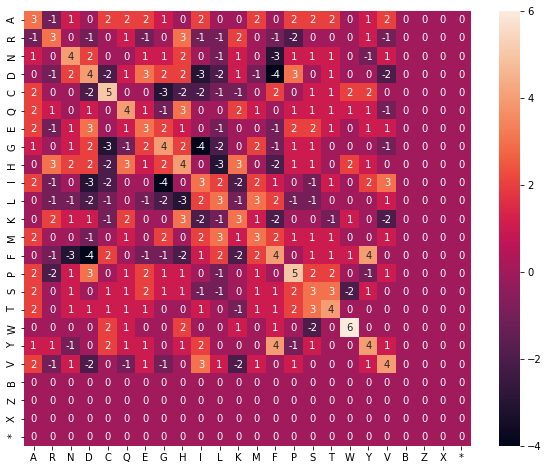



Substitution matrix SubMatrixComputedFromPfam


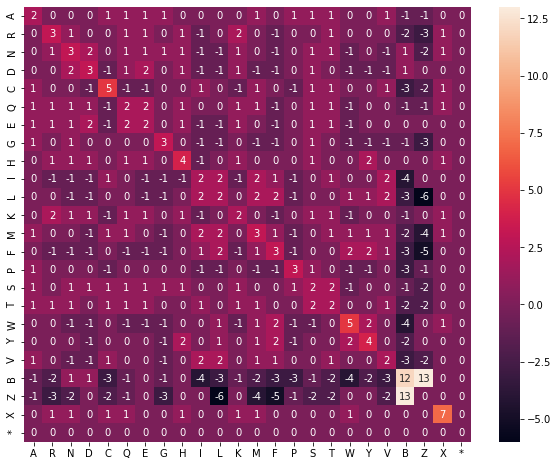



Substitution matrix BLOSUM45


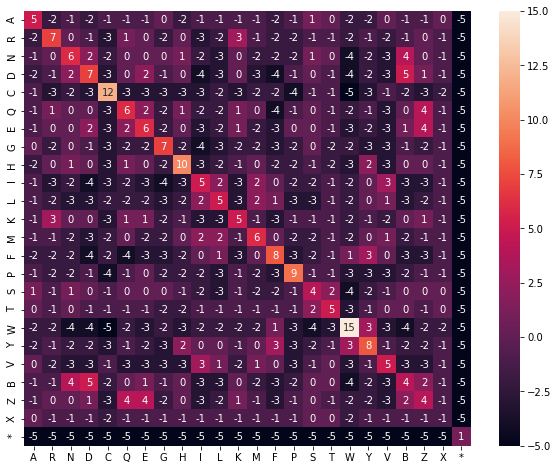



Substitution matrix BLOSUM50


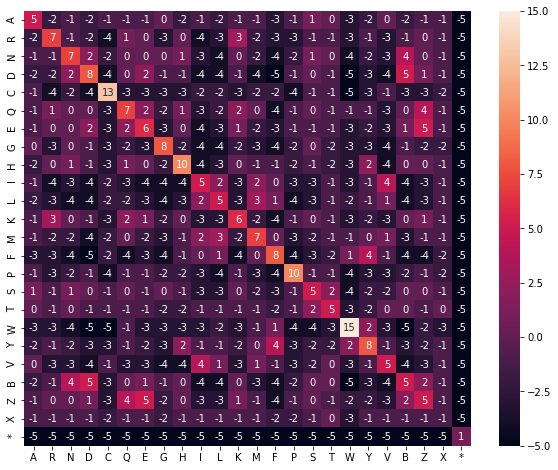



Substitution matrix BLOSUM62


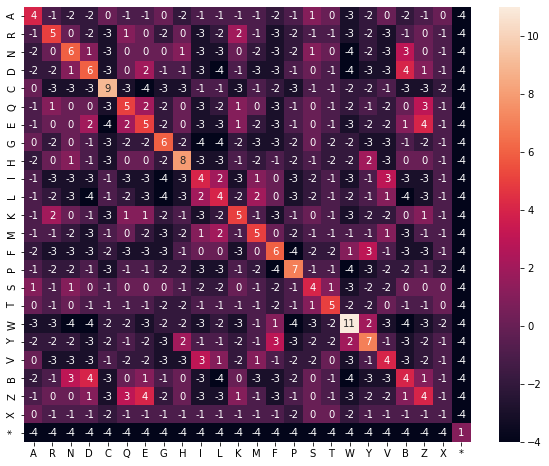



Substitution matrix BLOSUM80


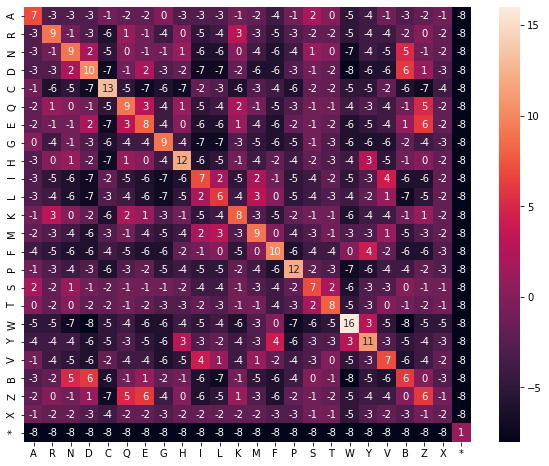



Substitution matrix BLOSUM90


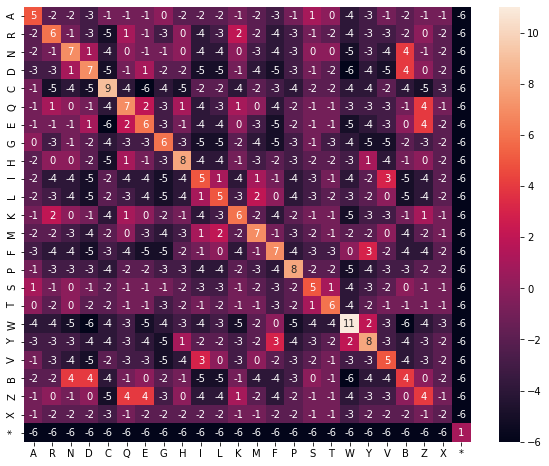



Substitution matrix PAM250


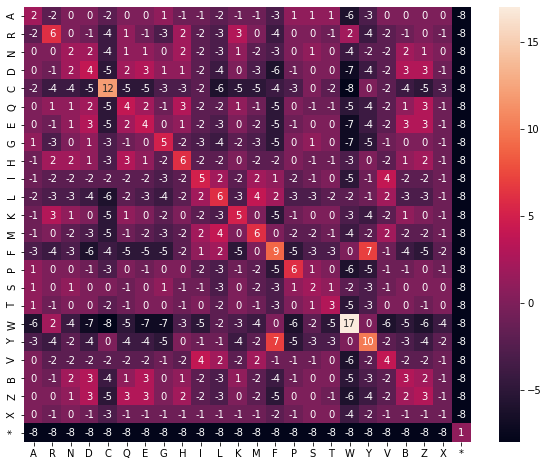



Substitution matrix PAM30


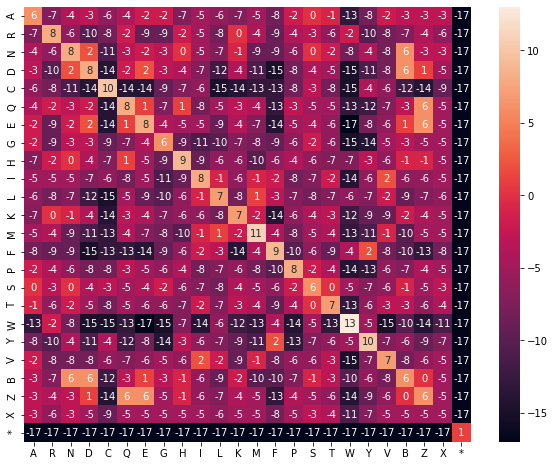



Substitution matrix PAM70


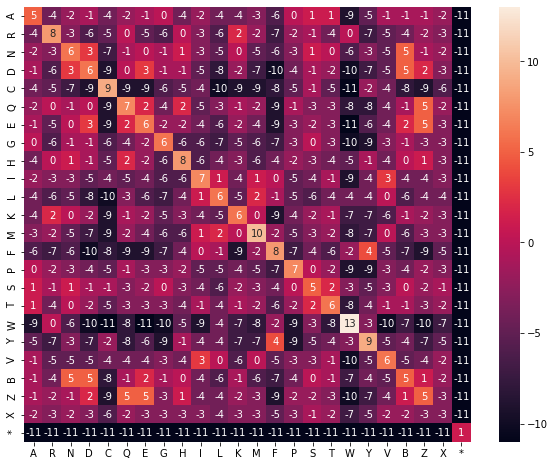

In [2]:
#AB06.1

from collections import defaultdict
import math
import seaborn as sns
import matplotlib.pyplot as plt
import requests

##########################################
#
# DATA
# 
# I got some sample alignments from PFAM.
# To do this properly you need more data
# and it should cover various protein families etc.
#
# http://pfam.xfam.org/family/PF10416/alignment/seed/format?format=pfam&alnType=seed&order=t&case=u&gaps=dashes&download=0
#
#
##########################################


pfam = [
"A2FX79_TRIVA/20-146       YYD-KQ-QFLQLRATLCQMSSKIKR-------------NKKISKFAEALEIIKRWAIRGDYEDHKRCLACGVLWFDQE---IAINTQQLKFLLFKCKSS-----INSTLHDSGLQPAPREAL--QKLLMERYP----YLKN--NMGEIR-KWTLRTYQP",
"A2EL50_TRIVA/14-141       ESD-QR-MYRKIQEVLSQLSTKNKR-------------NTKIDDFRELVDAIDIFENYDKESKWRRCLACGLVKFDGG---IAVNTSQLSILALRCKTS-----INTSLKGMGYTIISGNSSE-SEEFLKEIP----YISG--NPSEMR-QWTVRYLEE",
"A2DCS1_TRIVA/23-150       EAD-KQ-TYDRICAALTAPSNKNKK-------------NKRADEFREILEAISLFENHDEVDKWKRCLVCGVYQFEGG---IAVNISALKRLVFKCKSS-----INGSLKAIGYPNVTYKSST-CEELLKGIP----ILRG--NTAELR-QWTVRYQAP",
"A2F449_TRIVA/18-145       DTD-KM-TYDRIRQAITAPSNKNKK-------------NKRADEFREILEAIELYENHDQADKWKRCLVCGVFIFDKG---IAIKISALKQLIYKCKSS-----INGSLKAIGYPNVDYKSSM-CDELLNGIP----FLRG--NLVELR-QWTVRFRDR",
"A2EU97_TRIVA/13-140       ETD-KE-KYNELHQEFSSGVMKRAR-------------NGRAESFEEMLENIKKYCIRNDEDDWKRYLVCGVCWMDEA---IAINTRQLRLLVCKCKSS-----INGSLQKMGFSTNMAHSES-WKILFPKIP----LLKD--HFSELR-KWTIRYKPK",
"A2DGT4_TRIVA/24-151       PRD-KE-EYLSLKSLLDESSTKRNR-------------GHRMEAFDGILEAIHRYAERHDDDDWRRFLVCGVCWMDNM---IAINTRQLRLLISKCKSS-----INGSFQKMGYTTSQSHTES-RKFLFGKIP----LLKG--NFNELR-QWTIRSRAP",
"A2FBZ9_TRIVA/24-151       ETD-KN-SYKTLKLALDASISKRNR-------------GHRMEAFDSVLNAIHRFAERHDENDWRRFLVCGLCWMDNM---IAINTRQLRLLISKCKSS-----INGSLHKLGYTTNQSHTES-WKYLFDRIP----YLKD--NFPELR-QWTLRSRAS",
"A2DX95_TRIVA/16-143       DAD-KY-QYNCLRYSIATTASKNQR-------------NKRISTFNEAMDAIKMFAIRGDANDKLRSLVCGICWLNEG---IAINTHQLKTLLGKCKSS-----INGSLQKIGFSSNISRAET-TNAMTRFFP----FLNE--NSSELR-KWSVRNYPQ",
"A2E640_TRIVA/20-147       PID-MQ-RYNYLRLALSSSETKNQR-------------NRRIATFTEAMEAVRGFAIRGDSNDKLRCLVCGIAWLPEG---IAINTHQLKLLISRCKSS-----INGSLQKLGFTENLGRTAA-ANAMIAQYS----FLKE--NSTELR-KWSVRRKPS",
"A2DX21_TRIVA/22-149       KAD-LH-QYNCLRLALTSSESKNQR-------------NRRIATFTEAIEAVRVFAVRGDQYDRIRCLVCGIAWLPEG---LAINTHQLKLLISRCKSS-----INGSFQKLGFTEKLRRLAA-ANALISVYP----FLNE--NTSELR-KWSVRKRPA",
"A2EQ67_TRIVA/19-146       DMD-KY-HYNCLRMSISSQYSKNIR-------------NKRVENFTEIIDIIKRYCIRGQPDDWRRCLVCGVAWLHEG---IAINTRQLRLLIFKCKSS-----INGSLHKMGFTVNIGRTEA-ANALVMAIP----ILKD--NTNELR-QWTVRQTGN",
"A2FFZ1_TRIVA/19-146       DFD-KY-QYNCLRANLSANYSKNQR-------------NKRIENFTEILEIIRRFCVRGDGDDWRRFLVCGYCCFPDG---IAINTRQLKLLIFKCKSS-----INGSLHKMGLSSNIAKNEA-TNSLIMAIP----ILRD--NINEMR-QWTVRKFIK",
"A2DT03_TRIVA/19-146       DFD-KF-QYGILRVSLSTHYAKNQR-------------NKRVGNFTEILELIKRFCIRGDADDWRRCLVCGVCWLPNG---IAVNTRQLKLLIFKCKSS-----INGSLHKMGYSVNFGRAEP-TNSLVMAIP----ILKD--NINELR-QWTIRQCVG"
]


##########################################
#
# Data structures where we store our data
#
##########################################


sub = defaultdict(int)
freq = defaultdict(int)
aminoacids = ['A', 'R', 'N', 'D', 'C', 'Q', 'E', 'G', 'H', 'I', 'L', 'K', 'M', 'F', 'P', 'S', 'T', 'W', 'Y', 'V', 'B', 'Z', 'X', '*']
subMatrixNames = ["BLOSUM45","BLOSUM50","BLOSUM62","BLOSUM80","BLOSUM90","PAM250","PAM30","PAM70"]
subMatrices = {}

# The script "Substitution matrices 2" computes a matrix from alignments in Pfam.
# Here is the result for 1000 alignments each with up to 500 sequences. 
# (Overall, there are 15190 aligments and the largest has 2400 sequences.
# The calculation took 1h 10min and analysed 9 billion substitutions and 100 mio. amino acids.
pfamSubMatrix = [
[2, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, -1, -1, 0, 0],
[0, 3, 1, 0, 0, 1, 1, 0, 1, -1, 0, 2, 0, -1, 0, 0, 1, 0, 0, 0, -2, -3, 1, 0],
[0, 1, 3, 2, 0, 1, 1, 1, 1, -1, -1, 1, 0, -1, 0, 1, 1, -1, 0, -1, 1, -2, 1, 0],
[0, 0, 2, 3, -1, 1, 2, 0, 1, -1, -1, 1, -1, -1, 0, 1, 0, -1, -1, -1, 1, 0, 0, 0],
[1, 0, 0, -1, 5, -1, -1, 0, 0, 1, 0, -1, 1, 0, -1, 1, 1, 0, 0, 1, -3, -2, 1, 0],
[1, 1, 1, 1, -1, 2, 2, 0, 1, 0, 0, 1, 1, -1, 0, 1, 1, -1, 0, 0, -1, -1, 1, 0],
[1, 1, 1, 2, -1, 2, 2, 0, 1, -1, -1, 1, 0, -1, 0, 1, 1, -1, 0, 0, 0, 0, 0, 0],
[1, 0, 1, 0, 0, 0, 0, 3, 0, -1, -1, 0, -1, -1, 0, 1, 0, -1, -1, -1, -1, -3, 0, 0],
[0, 1, 1, 1, 0, 1, 1, 0, 4, -1, 0, 1, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 1, 0],
[0, -1, -1, -1, 1, 0, -1, -1, -1, 2, 2, -1, 2, 1, -1, 0, 1, 0, 0, 2, -4, 0, 0, 0],
[0, 0, -1, -1, 0, 0, -1, -1, 0, 2, 2, 0, 2, 2, -1, 0, 0, 1, 1, 2, -3, -6, 0, 0],
[0, 2, 1, 1, -1, 1, 1, 0, 1, -1, 0, 2, 0, -1, 0, 1, 1, -1, 0, 0, -1, 0, 1, 0],
[1, 0, 0, -1, 1, 1, 0, -1, 0, 2, 2, 0, 3, 1, -1, 0, 1, 1, 1, 1, -2, -4, 1, 0],
[0, -1, -1, -1, 0, -1, -1, -1, 0, 1, 2, -1, 1, 3, -1, 0, 0, 2, 2, 1, -3, -5, 0, 0],
[1, 0, 0, 0, -1, 0, 0, 0, 0, -1, -1, 0, -1, -1, 3, 1, 0, -1, -1, 0, -3, -1, 0, 0],
[1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 2, 2, -1, 0, 0, -1, -2, 0, 0],
[1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 2, 2, 0, 0, 1, -2, -2, 0, 0],
[0, 0, -1, -1, 0, -1, -1, -1, 0, 0, 1, -1, 1, 2, -1, -1, 0, 5, 2, 0, -4, 0, 1, 0],
[0, 0, 0, -1, 0, 0, 0, -1, 2, 0, 1, 0, 1, 2, -1, 0, 0, 2, 4, 0, -2, 0, 0, 0],
[1, 0, -1, -1, 1, 0, 0, -1, 0, 2, 2, 0, 1, 1, 0, 0, 1, 0, 0, 2, -3, -2, 0, 0],
[-1, -2, 1, 1, -3, -1, 0, -1, 0, -4, -3, -1, -2, -3, -3, -1, -2, -4, -2, -3, 12, 13, 0, 0],
[-1, -3, -2, 0, -2, -1, 0, -3, 0, 0, -6, 0, -4, -5, -1, -2, -2, 0, 0, -2, 13, 0, 0, 0],
[0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 7, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]                 
]


##########################################
#
# At biopython on github, there is a directory
# with many subsitution matrices. We download
# these. If you want more, chck it out
# and extend the list subMatrixNames to analyse
# more matrices.
#
# https://github.com/biopython/biopython/tree/master/Bio/Align/substitution_matrices/data
#
##########################################


def url(sm):
  return "https://raw.githubusercontent.com/biopython/biopython/master/Bio/Align/substitution_matrices/data/"+sm

def getMatrix(sm):
  rows=[]
  r = requests.get( url(sm) ) 
  data = str(r.content, encoding = 'utf-8')
  for line in data.split("\n"):
    if line!="" and line[0] in aminoacids:
      row = [int(s) for s in line[2:].split()]
      rows.append(row)
  return rows





##########################################
#
# Main code to generate our own sub matrix
#
##########################################


def getCol(pfam, i):
  """returns the ith column from the list of aligned sequences"""
  return [p[i] for p in pfam]

def ordered(ci,cj):
  if ci<cj: return (ci,cj)
  return (cj,ci)

def cnt(col):
  for c in col:
    freq[c]+=1
  for i in range(len(col)):
    for j in range(i+1,len(col)):
      if col[i]!="-" and col[j]!="-":
        sub[ordered(col[i],col[j])]+=1

def align2sub(pfam):
  pfam = [s.split()[1] for s in pfam]
  noCol = len(pfam[0])
  for i in range(noCol):
    col = getCol(pfam, i)
    cnt(col)
  totalSub = sum(sub.values())
  totalFreq = sum(freq.values())
  rows = []
  for ci in aminoacids:
    row = []
    for cj in aminoacids:
      if ordered(ci,cj) in sub:
        logoddsratio = round(math.log2(  (sub[ordered(ci,cj)] / totalSub) / ( (freq[ci] / totalFreq) * (freq[cj] / totalFreq) ) ))
      else:
        logoddsratio = 0
      row.append(logoddsratio)
    rows.append(row)
  return rows


##########################################
#
# Main programme to download the matrices
# compute our own and display all of them
# in a nice heatmap
#
###########################################

# Enlarge figure to get a more legible heatmap of the sub matrices
plt.rcParams["figure.figsize"] = (10,8)

# Compute a logodds substitution matrix from our own data
subMatrices["MyLogOddsSubsMatrix"] = align2sub(pfam)

# Similar to the above, but computed from larger data (in a separate script)
subMatrices["SubMatrixComputedFromPfam"] = pfamSubMatrix

# Download Blosum and Pam matrices from Biopython on github
print("Downloading ")
for sm in subMatrixNames:
  print(sm+" ", end="")
  subMatrices[sm] = getMatrix(sm)
print()

# Print heatmaps for all substitution matrices
for sm in subMatrices:
  print("\n\nSubstitution matrix %s"%(sm))
  ax = sns.heatmap(subMatrices[sm], annot=True, xticklabels=aminoacids, yticklabels=aminoacids)
  plt.show()


#AB06.2 Generating a substitution matrix 2

If you want to generate a substitution matrix from more data, then you can do the following. At ftp://ftp.ebi.ac.uk/pub/databases/Pfam/current_release you find the whole PFAM data. E.g. Pfam-A.seed.gz. The smallest file. Download and unzip it. It is half a Gigabyte! This script analysis this data. With maxNo and maxSize you can control how much of the data is generated. 

For example, for maxNo=10000 alignments and maxSize=500 sequences per alignment my desktop takes 2h.

To run this script, either download the data to your desktop and run the code directly on your desktop or upload the data to collaboratory and execute it there. You probably have to adjust the path to the file.



In [ ]:
# AB06.2

from collections import defaultdict
import math
import seaborn as sns
import matplotlib.pyplot as plt
import time

##########################################
#
# Let's do a large scale computation on PFAM
# At ftp://ftp.ebi.ac.uk/pub/databases/Pfam/current_release
# you can download Pfam data. Download
# Pfam-A.seed.gz and unzip it. Then you
# can run this script and generate a
# substitution matrix on very large data.
#
# Use maxSize and maxNo to decide how much data
# you want to process. 
##########################################


sub = defaultdict(int)
freq = defaultdict(int)
aminoacids = ['A', 'R', 'N', 'D', 'C', 'Q', 'E', 'G', 'H', 'I', 'L', 'K', 'M', 'F', 'P', 'S', 'T', 'W', 'Y', 'V', 'B', 'Z', 'X', '*']

def readPfam():
    start=time.time()
    maxSize=500 # must be greater 10
    maxNo=10000
    Print("\n\nWill process %d sequence groups. Each maximally %d sequences."%(maxNo, maxSize))
    i=0
    hash = True
    all=[]
    for line in open("Pfam-A.seed",encoding='latin-1'):
        if not line.startswith("#"):
            if hash:
                hash=False
                seqs=[]
            l = line.split()
            if len(l)>1:
                seq = l[1]
                seqs.append(seq)
        else:
            if not hash:
                hash=True
                if len(seqs)>10:
                    all.append(len(seqs))
                if len(seqs)>10 and i<maxNo:
                    i+=1
                    align2sub(seqs[:maxSize])
                    print(".",end="", flush=True)
                    if i % int(maxNo/100)==0: print("%d%s (%ds)"%(int(100*i/maxNo), "%", time.time()-start), end="", flush=True)
    took = time.time()-start
    print("\n\nThere are %d sequence groups. The largest has %d sequences. %d groups processed. Each maximally %d sequences. Took %d sec. On avg. %.2fs"%(len(all), max(all), maxNo, maxSize, took, took/maxNo))



##########################################
#
# Main code to generate our own sub matrix
#
##########################################


def getCol(pfam, i):
  """returns the ith column from the list of aligned sequences"""
  return [p[i] for p in pfam if p[i] != "-" and p[i] != "."]

def ordered(ci,cj):
  if ci<cj: return (ci,cj)
  return (cj,ci)

def cnt(col):
  for c in col:
    freq[c]+=1
  for i in range(len(col)):
    for j in range(i+1,len(col)):
      if col[i]!="-" and col[j]!="-":
        sub[ordered(col[i],col[j])]+=1

def align2sub(pfam):
  noCol = len(pfam[0])
  for i in range(noCol):
    col = getCol(pfam, i)
    cnt(col)

def sub2heat():
  totalSub = sum(sub.values())
  totalFreq = sum(freq.values())
  print("Overall, %d substitutions and %s amino acids processed"%(totalSub, totalFreq))
  rows = []
  for ci in aminoacids:
    row = []
    for cj in aminoacids:
      if ordered(ci,cj) in sub:
        logoddsratio = round(math.log2(  (sub[ordered(ci,cj)] / totalSub) / ( (freq[ci] / totalFreq) * (freq[cj] / totalFreq) ) ))
      else:
        logoddsratio = 0
      row.append(logoddsratio)
    rows.append(row)
  return rows

readPfam()
h=sub2heat()

print("Here is a print out of the computed matrix. Cut and paste it for any fancy visualisation beyond this heatmap.")

print(aminoacids)

for row in h:
    print(row, end="")
    print(",")

    
ax = sns.heatmap(h, annot=True, xticklabels=aminoacids, yticklabels=aminoacids)
plt.show()


#AB07 Smith-Waterman Algorithm

Create local alignment by allowing the algorithm to chop off the left and right side of an alignment, if it increases the score overall. Chopping off to the left is achieved by taking the maximum of the three directions as well as zero. This means that the score can never drop below zero. Important: if all directions would be negative and zero is chosen, then the direction set is empty. In backtracking this is used, as the backtracking stops if it comes to a cell with empty direction. Max_pos stores the maximal value across the entire matrix. The position where the maximum is, is the right side of the alignment. So ending the alignment at the maximum corresponds to chopping of the right side. Although there may be multiple alignments with the same max score, we pick only one. Namely, the first one, as d[i,j]>max_pos[0] uses the greater symbol and so max_pos only changes if higher value is found. If it was greater equal then the last max would be chosen. Really cool: the align code is not changed in comparison to the implementations above. 

Dynamic programming matrices for Smith-Waterman algorithm.



Alignment (match score=0, mismatch score=0, gap score=0):

CED
CED


Matrix d for alignment
  CED
  CED




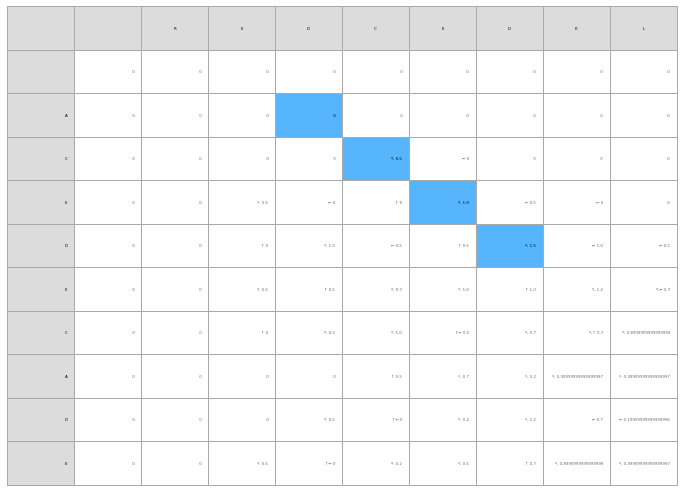

In [ ]:
#AB07 for double

#@title Input strings and scoring scheme { display-mode: "both" }
a = "ACEDECADE" #@param {type:"string"}
b = "REDCEDKL" #@param {type:"string"}
sm = 0.5 #@param {type:"number"}
sr = -0.3 #@param {type:"number"}
sg = -0.5 #@param {type:"number"}
m = len(a)
n = len(b)
d={}  # we store the dynamic programming matrix in a dictionary
db={} # and the backtracking matrix, too.

 
def max_dir(zero,dN,dW,dNW): 
  """Returns the maximum of dN, dW, dNW and a set with the directions N, W, NW, which held the maximum value.
  max_dir(4,4,3) return {"N","W"} and miax_dir(3,2,4) {"NW"}.
  """
  direction = set([]) # empty set
  if dN == max(zero,dN,dW,dNW):
    direction.add("N")
  if dW == max(zero,dN,dW,dNW):
    direction.add("W")
  if dNW == max(zero,dN,dW,dNW):
    direction.add("NW")
  return (max(zero,dN,dW,dNW), direction)


def water(a,b):
  """Computes the Smith-Waterman score (and backtracking matrix) between strings a and b.""" 
  
  d[0,0] = 0 
  db[0,0] = set([]) # empty set
  
  # Initialise the first column
  for i in range(1,m+1):
    d[i,0] = 0
    db[i,0] = set([])
    
  # Initialise the first row
  for j in range(1,n+1):
    d[0,j] = 0
    db[0,j] = set([])

  max_pos = (0,0,0) # max value and position  
  # Fill all cells of the matrix
  for i in range(1,m+1):
    for j in range(1,n+1):
      # if letters are the same, no edit operation is used, otherwise it is one (replace operation)
      if a[i-1] == b[j-1]: 
        s = sm
      else:        
        s = sr
      # Get the maximum of 0 and the scores N, W, and NW and remember the direction.
      (d[i,j], db[i,j]) = max_dir(0,
                                  d[i-1,j  ]+sg, 
                                  d[i  ,j-1]+sg, 
                                  d[i-1,j-1]+s)
      if d[i,j]>=max_pos[0]:
        max_pos = (d[i,j],i,j)
  return max_pos
  
def align(a,b, i,j, line1, line2):
  """prints all aligments for strings a and b. 
  Requires that needle was run
  (for the db matrix with the direction information)."""
  if "N" in db[i,j]:
    align(a,b,i-1,j,   a[i-1]+line1,    "-"+line2)
  if "W" in db[i,j]:
    align(a,b,i  ,j-1,    "-"+line1, b[j-1]+line2)
  if "NW" in db[i,j]:
    align(a,b,i-1,j-1, a[i-1]+line1, b[j-1]+line2)
  if db[i,j]==set([]): # empty set. we have reached the top left corner of db
    print()
    print(line1)       # and have collected the full alignment
    print(line2)   

    
    
print("Dynamic programming matrices for Smith-Waterman algorithm.\n")

(s,i,j) = water(a,b)

print("\n\nAlignment (match score=%d, mismatch score=%d, gap score=%d):"%(sm,sr,sg))
align(a,b,i,j, "", "") 
  
try:
  print_d(path="local", local = (i,j))
except:
  print("\nError: You have to run the print_d script at the top of the notebook to print the matrix nicely.")


Dynamic programming matrices for Smith-Waterman algorithm.



Alignment (match score=2, mismatch score=-1, gap score=-1):

NDINT
N-I-T


Matrix d for alignment
  NDINT
  N-I-T




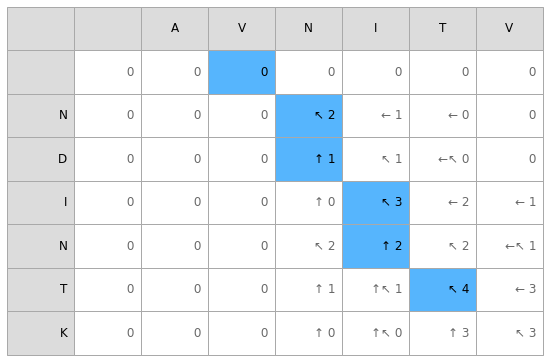

In [ ]:
#AB07

#@title Input strings and scoring scheme { display-mode: "both" }
a = "NDINTK" #@param {type:"string"}
b = "AVNITV" #@param {type:"string"}
sm =  2#@param {type:"integer"}
sr =  -1#@param {type:"integer"}
sg =  -1#@param {type:"integer"}
m = len(a)
n = len(b)
d={}  # we store the dynamic programming matrix in a dictionary
db={} # and the backtracking matrix, too.

 
def max_dir(zero,dN,dW,dNW): 
  """Returns the maximum of dN, dW, dNW and a set with the directions N, W, NW, which held the maximum value.
  max_dir(4,4,3) return {"N","W"} and miax_dir(3,2,4) {"NW"}.
  """
  direction = set([]) # empty set
  if dN == max(zero,dN,dW,dNW):
    direction.add("N")
  if dW == max(zero,dN,dW,dNW):
    direction.add("W")
  if dNW == max(zero,dN,dW,dNW):
    direction.add("NW")
  return (max(zero,dN,dW,dNW), direction)


def water(a,b):
  """Computes the Smith-Waterman score (and backtracking matrix) between strings a and b.""" 
  
  d[0,0] = 0 
  db[0,0] = set([]) # empty set
  
  # Initialise the first column
  for i in range(1,m+1):
    d[i,0] = 0
    db[i,0] = set([])
    
  # Initialise the first row
  for j in range(1,n+1):
    d[0,j] = 0
    db[0,j] = set([])

  max_pos = (0,0,0) # max value and position  
  # Fill all cells of the matrix
  for i in range(1,m+1):
    for j in range(1,n+1):
      # if letters are the same, no edit operation is used, otherwise it is one (replace operation)
      if a[i-1] == b[j-1]: 
        s = sm
      else:        
        s = sr
      # Get the maximum of 0 and the scores N, W, and NW and remember the direction.
      (d[i,j], db[i,j]) = max_dir(0,
                                  d[i-1,j  ]+sg, 
                                  d[i  ,j-1]+sg, 
                                  d[i-1,j-1]+s)
      if d[i,j]>=max_pos[0]:
        max_pos = (d[i,j],i,j)
  return max_pos
  
def align(a,b, i,j, line1, line2):
  """prints all aligments for strings a and b. 
  Requires that needle was run
  (for the db matrix with the direction information)."""
  if "N" in db[i,j]:
    align(a,b,i-1,j,   a[i-1]+line1,    "-"+line2)
  if "W" in db[i,j]:
    align(a,b,i  ,j-1,    "-"+line1, b[j-1]+line2)
  if "NW" in db[i,j]:
    align(a,b,i-1,j-1, a[i-1]+line1, b[j-1]+line2)
  if db[i,j]==set([]): # empty set. we have reached the top left corner of db
    print()
    print(line1)       # and have collected the full alignment
    print(line2)   

    
    
print("Dynamic programming matrices for Smith-Waterman algorithm.\n")

(s,i,j) = water(a,b)

print("\n\nAlignment (match score=%d, mismatch score=%d, gap score=%d):"%(sm,sr,sg))
align(a,b,i,j, "", "") 
  
try:
  print_d(path="local", local = (i,j))
except:
  print("\nError: You have to run the print_d script at the top of the notebook to print the matrix nicely.")


#AB07.2 Affine gap penalties



Dynamic programming matrices for Needleman-Wunsch algorithm and affine gap penalties.

Score=17


All alignments (match score=10, mismatch score=-10, gap opening=-3, gap extension=-1):

apied--
-p-edro


Matrix d



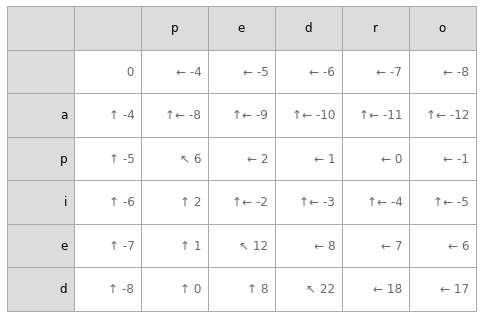



Matrix d_del



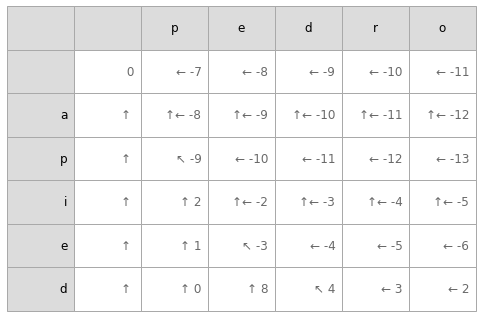



Matrix d_ins



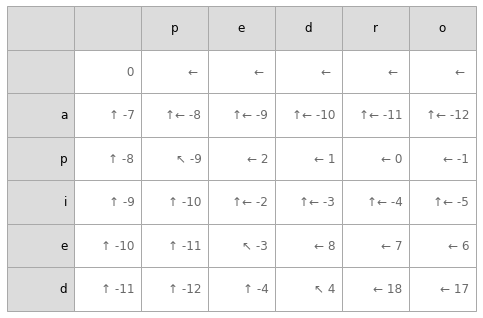

In [ ]:
#AB07.2

#@title Input strings and scoring scheme { display-mode: "both" }
a = "apied" #@param {type:"string"}
b = "pedro" #@param {type:"string"}
sm = 10 #@param {type:"integer"}
sr =  -10#@param {type:"integer"}
s_open =  -3#@param {type:"integer"}
s_ext =  -1#@param {type:"integer"}

d={}  # we store the dynamic programming matrix in a dictionary
db={} # and the backtracking matrix, too.
d_del={} 
d_ins={}
m = len(a)
n = len(b)

from tabulate import tabulate

def max_dir(dN,dW,dNW):
  """Returns the maximum of dN, dW, dNW and a set with the directions N, W, NW, which held the maximum value.
  max_dir(4,4,3) return {"N","W"} and miax_dir(3,2,4) {"NW"}.
  """
  direction = set([]) # empty set
  if dN == max(dN,dW,dNW):
    direction.add("N")
  if dW == max(dN,dW,dNW):
    direction.add("W")
  if dNW == max(dN,dW,dNW):
    direction.add("NW")
  return (max(dN,dW,dNW), direction)




def needle(a,b):
  """Computes the Levenshtein distance (and backtracking matrix) between strings a and b.""" 
  
  d[0,0] = 0 
  db[0,0] = set([]) # empty set
  d_del[0,0]=0
  d_ins[0,0]=0
  
  # Initialise the first column and d_ins
  for i in range(1,m+1):
    d[i,0] = s_open + i*s_ext
    db[i,0] = {"N"}
    d_ins[i,0] = d[i,0] + s_open # init of d_ins

  # Initialise the first row and d_del
  for j in range(1,n+1):
    d[0,j] = s_open + j*s_ext
    db[0,j] = {"W"}
    d_del[0,j] = d[0,j] + s_open # init of d_del

  # Fill all cells of the matrix
  for i in range(1,m+1):
    for j in range(1,n+1):
      # if letters are the same, no edit operation is used, otherwise it is one (replace operation)
      if a[i-1] == b[j-1]: 
        s = sm
      else:        
        s = sr
      # Get the maximum of the scores N, W, and NW and remember the direction.
      d_del[i,j]= max(d_del[i-1,j] + s_ext,       # extend an existing gap
                      d[i-1,j] + s_open + s_ext)  # start a new gap
      d_ins[i,j]= max(d_ins[i,j-1] + s_ext,       # extend an existing gap
                      d[i,j-1] + s_open + s_ext)  # start a new gap                      
      (d[i,j], db[i,j]) = max_dir(d_del[i,j], 
                                  d_ins[i,j], 
                                  d[i-1,j-1]+s)
  return d[m,n]
  
def align(a,b, i,j, line1, line2):
  """prints all aligments for strings a and b. 
  Requires that needle was run
  (for the db matrix with the direction information)."""
  if "N" in db[i,j]:
    align(a,b,i-1,j,   a[i-1]+line1,    "-"+line2)
  if "W" in db[i,j]:
    align(a,b,i  ,j-1,    "-"+line1, b[j-1]+line2)
  if "NW" in db[i,j]:
    align(a,b,i-1,j-1, a[i-1]+line1, b[j-1]+line2)
  if db[i,j]==set([]): # empty set. we have reached the top left corner of db
    print()
    print(line1)       # and have collected the full alignment
    print(line2)   

    
    
print("Dynamic programming matrices for Needleman-Wunsch algorithm and affine gap penalties.\n")
l=needle(a,b)
print("Score=%d"%(l))
print("\n\nAll alignments (match score=%d, mismatch score=%d, gap opening=%d, gap extension=%d):"%(sm,sr,s_open, s_ext))
align(a,b,len(a),len(b), "", "") 



try:
  print_d()
  print_d(d_del_ins="d_del")
  print_d(d_del_ins="d_ins")
except:
  print("\nError: You have to run the print_d script at the top of the notebook to print the matrix nicely.")


#AB08 Levensthein distance in linear time

Most cells in the matrix do not contribute to the final score and alignment. We can reduce the computational time from quadratic to linear by considering only the main diagonals. We set a cut-off s for the Levensthein distance and only consider results better than s. The cut-off helps us to reduce the computation, as we only consider the s/2 diagonals above and below the main matrix. Run the code and check out the number of operations and speed of computation.


Dynamic programming to compute the Levenshtein distance of two strings.

The Levenshtein distance is 13.


Note, the algorithm is linear, but visualising the matrix is quadratic and hence costly for large strings.



Matrix d for alignment
  Peter sass im Garten und ass eine--------
  Peter sass im Au-to- und ass einen Marsri




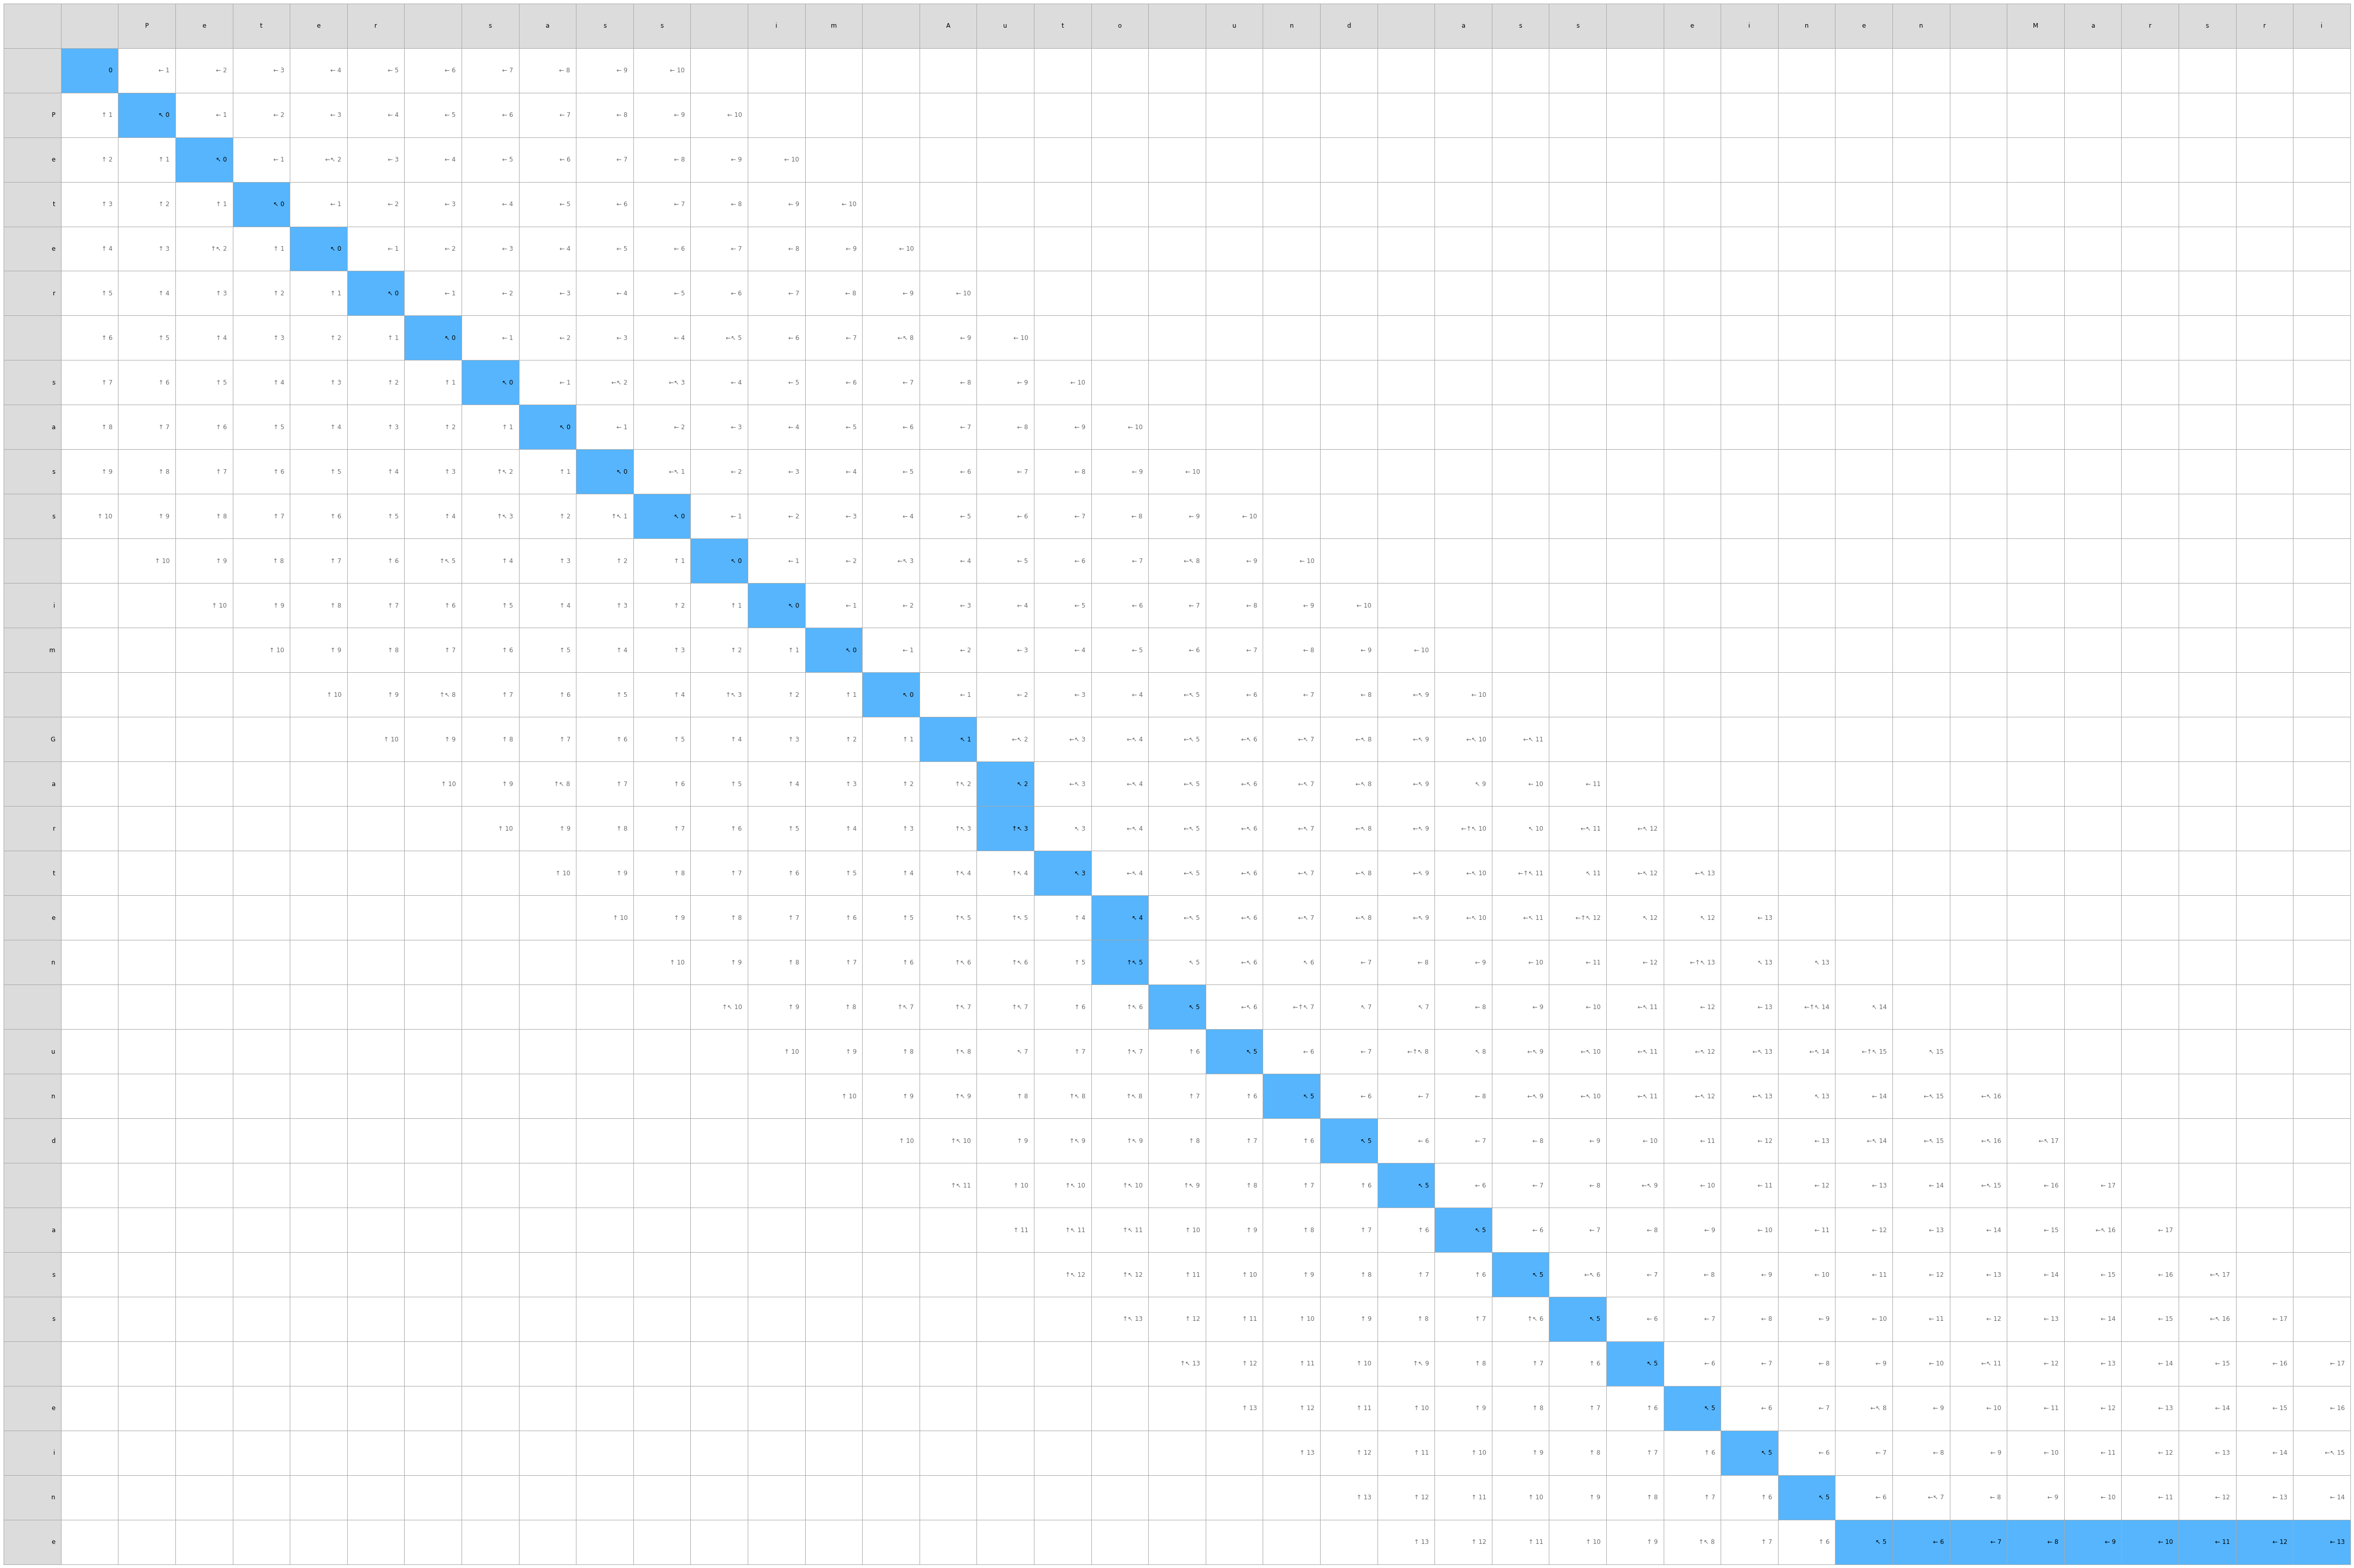

In [ ]:
#AB08

#@title Input strings for Levensthein distance { display-mode: "both" }
a = "Peter sass im Garten und ass eine" #@param {type:"string"}
b = "Peter sass im Auto und ass einen Marsri" #@param {type:"string"}
s = 20 #@param {type:"integer"}
print_matrix = True #@param {type:"boolean"}

m = len(a)
n = len(b)
d={}  # we store the dynamic programming matrix in a dictionary
db={} # and the backtracking matrix, too.

from tabulate import tabulate

# how many diagonals off the main diagonal are we considering
off = round(s/2)


def min_dir(dN, dW, dNW):
  """Returns the minimum of dN, dW, dNW and a set with the directions N, W, NW, which held the minimal value.
  dN, dW, and dNW can also be None, but at least one must be not None.
  min_dir(2,2,3) return {"N","W"} and min_dir(3,2,1) {"NW"}.
  """
  minimum = min(filter(lambda x: not x is None, [dN,dW,dNW]))
  direction = set([]) # empty set
  if not dN is None and dN == minimum:
    direction.add("N")
  if not dW is None and dW == minimum:
    direction.add("W")
  if not dNW is None and dNW == minimum:
    direction.add("NW")
  return (minimum, direction)


def lev(a,b):
  """Computes the Levenshtein distance (and backtracking matrix) between strings a and b.""" 
  
  d[0,0] = 0 
  db[0,0] = set([]) # empty set
  ops = 0 
  
  # Initialise the first column
  for i in range(1,off+1):
    d[i,0] = i
    db[i,0] = {"N"}
    ops += 1
    
  # Initialise the first row
  for j in range(1,off+1):
    d[0,j] = j
    db[0,j] = {"W"}
    ops += 1
    
  # Fill all cells of the matrix
  for i in range(1,m+1):
    for j in range(max(1,i-off),  min(i+off+1,n+1)):
      # if letters are the same, no edit operation is used, otherwise it is one (replace operation)
      if a[i-1] == b[j-1]: 
        s = 0
      else:        
        s = 1
      if (i-1,j) in d: 
        dN = d[i-1,j]+1
      else: 
        dN = None
      if (i,j-1) in d:
        dW = d[i  ,j-1]+1
      else:
        dW = None
      if (i-1,j-1) in d:
        dNW = d[i-1,j-1]+s
      else:
        dNW = None
      # Get the minimum of the scores N, W, and NW and remember the direction.
      (d[i,j], db[i,j]) = min_dir(dN, dW, dNW)
      ops += 3
          
  #print("The algorithm used %d plus operations.\n"%(ops))
  if (m,n) in d:
    return d[m,n]
  else:
    return None


print("Dynamic programming to compute the Levenshtein distance of two strings.\n")

ld = lev(a,b)

if ld:
  print("The Levenshtein distance is %d."%(ld))
  print()
else:
  print("Levensthein distance is above required cut-off")

try:
  if print_matrix:
    print("\nNote, the algorithm is linear, but visualising the matrix is quadratic and hence costly for large strings.\n")
    print_d(path="one")
except:
  print("\nError: You have to run the print_d script at the top of the notebook to print the matrix nicely.")



#AB08.2 Levenshtein distance in Exponential, quadratic, and linear time**
The code shows three implementations.

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


----------------------------
0.00s, lev=0, n=0, Lin
0.00s, lev=0, n=0, Quad
0.00s, lev=0, n=0, Exp
----------------------------
0.00s, lev=0, n=2, Lin
0.00s, lev=0, n=2, Quad
0.00s, lev=0, n=2, Exp
----------------------------
0.00s, lev=0, n=4, Lin
0.00s, lev=0, n=4, Quad
0.00s, lev=0, n=4, Exp
----------------------------
0.00s, lev=0, n=6, Lin
0.00s, lev=0, n=6, Quad
0.01s, lev=0, n=6, Exp
----------------------------
0.00s, lev=0, n=8, Lin
0.00s, lev=0, n=8, Quad
0.17s, lev=0, n=8, Exp
----------------------------
0.00s, lev=1, n=10, Lin
0.00s, lev=1, n=10, Quad
4.94s, lev=1, n=10, Exp
----------------------------
0.00s, lev=2, n=30, Lin
0.00s, lev=2, n=30, Quad
----------------------------
0.00s, lev=3, n=50, Lin
0.00s, lev=3, n=50, Quad
----------------------------
0.00s, lev=3, n=70, Lin
0.00s, lev=3, n=70, Quad
----------------------------
0.00s, lev=7, n=90, Lin
0.06s, lev=7, n=90, Quad
----------------------------
0.00s, lev=10, n=100, Lin
0.01s, lev=10, n=100, Quad
---------

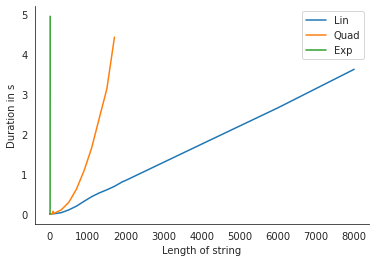

In [ ]:
# AB08.2
from tabulate import tabulate
from collections import defaultdict
import time
import random
import matplotlib.pyplot as plt
import seaborn as sns


def mismatch(c,d):
  """Returns 1, if characters c and d mismatch"""
  return int(c!=d)

def minimum(a,b,c):
  """Returns the minimum of a, b, and c. Variables may 
  be None, but at least one has to be a number. 
  The function is needed as the built-in min function 
  cannot handle None values. Handling None is needed
  for levLin."""
  return min([x for x in [a,b,c] if not x is None])

def d2str(d,a,b,m,n):
  """Turns the matrix d into a string using tabulate"""
  rows = [list("  "+b)]
  for i in range(0,m+1):
    row = [(" "+a)[i]]
    for j in range(0,n+1): 
      if not (i,j) in d: row.append("")
      else: row.append(str(d[i,j]))
    rows.append(row)
  print("\nd=\n"+tabulate(rows, tablefmt="plain"))

def randomDNA(n,m):
  """Returns a random string of length n
  and a second which may differ in up to m positions."""
  a = [random.choice(list("acgt")) for x in range(n)]
  b = a.copy()
  for i in random.sample(range(n), m):
    b[i] = random.choice(list("acgt"))
  return ("".join(a), "".join(b))

def levExp(a,b):
  """Levenshtein distance of a and b using recursion."""
  m = len(a)
  n = len(b)
  if m==0: return n
  elif n==0: return m
  return min(levExp(a[:-1], b)      + 1, 
             levExp(a,      b[:-1]) + 1, 
             levExp(a[:-1], b[:-1]) + mismatch(a[-1], b[-1])
            )

def levQuad(a,b):
  """Levenshtein distance of a and b using dynamic programming."""
  m = len(a)
  n = len(b)
  d = {}
  d[0,0] = 0 
  for i in range(1,m+1): d[i,0] = i
  for j in range(1,n+1): d[0,j] = j
  for i in range(1,m+1):
    for j in range(1,n+1):
      d[i,j] = min(d[i-1,j  ] + 1, 
                   d[i  ,j-1] + 1, 
                   d[i-1,j-1] + mismatch(a[i-1], b[j-1]))
  #d2str(d,a,b,m,n)
  return d[m,n]

def levLin(a,b):
  """Levenshtein distance of a and b using dynamic programming only
  along the diagonal plus/minus off diagonals.""" 
  m = len(a)
  n = len(b)
  d={}
  d[0,0] = 0 
  off = min(100, max(int(max(m,n)*0.1),2))
  #print(off)
  for i in range(1,off+1):
    d[i,0] = i
  for j in range(1,off+1):
    d[0,j] = j
  for i in range(1,m+1):
    for j in range(max(1,i-off),  min(i+off+1,n+1)):
      dN, dW, dNW = None, None, None
      if (i-1,j  ) in d: dN  = d[i-1,j  ] + 1
      if (i  ,j-1) in d: dW  = d[i,  j-1] + 1
      if (i-1,j-1) in d: dNW = d[i-1,j-1] + mismatch(a[i-1], b[j-1])
      d[i,j] = minimum(dN, dW, dNW)
  #d2str(d,a,b,m,n)
  if (m,n) in d: return d[m,n]
  return -1

def lev(a,b,alg):
  """Runs all algorithms and prints out durations and Levenshtein distance."""
  start = time.time()
  if alg=="Exp": l=levExp(a,b) 
  if alg=="Quad": l=levQuad(a,b) 
  if alg=="Lin": l=levLin(a,b) 
  duration = time.time()-start
  print("%.2fs, lev=%d, n=%d, %s"%(duration, l, len(a),alg))
  return duration

# we have three algorithms with different runtime behaviour.
# Durations stores the time they take to execute and the list l
# has the lengths of strings we will test
algs = ["Lin","Quad","Exp"]
durations = defaultdict(list)
ls = list(range(0,10,2))+list(range(10,100,20))+list(range(100,2000,200))+list(range(2000,10000,2000))

# For each length and for each algorithm run it and keep it execution time in durations.
for l in ls:
  if algs != []:
    durations["Len"].append(l)
    (a,b) = randomDNA(l, int(0.1*l))
    print("----------------------------")
    for alg in algs:
      duration = lev(a,b,alg)
      durations[alg].append(duration)
      if duration > 4:
        algs.remove(alg)


# Plot the execution times in a graph. 
# Mathplotlib has commands for plotting graphs
# Seaborn (sns) is a nice add on to make graphs more beautiful.
algs = ["Lin","Quad","Exp"]
sns.set_style("white")
for alg in algs:
  plt.plot(durations["Len"][:len(durations[alg])],durations[alg],label=alg)
sns.despine()
plt.ylabel('Duration in s')
plt.xlabel('Length of string')
plt.legend()
plt.show()

#AB09 Stats

Starting from a query sequence we compare it to many sequences and compute a Z-score.





Loading Pfam alignment PF00693
Sequence comparison
Query sequence from PDB 1OSN
Database sequences from Pfam PF00693 (808 sequences)


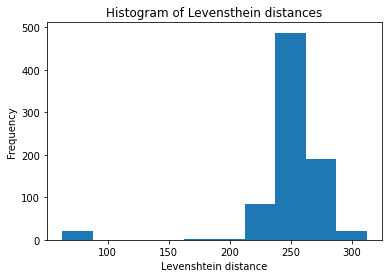

Best score of 63 (Z-score of 5.47)

GAYGIGKTTAAEEFLHHFAITpNRILLIGEPLSYWRNLAGEDAICGIYGTQTRRLNGDVSPEDAQRLTAHFQSLFCSPHAIMHAKISALMDTSTSDLVQVNKEPYKIMLSDRHPIASTICFPLSRYLVGDMSPAALPGLLFTLPAEPPGTNLVVCTVSLPSHLSRVSKRARPGETVNLPFVMVLRNVYIMLINTIIFLKTNNWHAGWNTLSFCNDVFKQKLQKSECIKLREVPGIEDTLFAVLKLPELCGEFGNILPLWAWGMETLSNCLRSMSPFVLS



In [ ]:
#AB09 Statistics

from statistics import stdev, mean
import matplotlib.pyplot as plt

pfam_id = "PF00693" # Herpes thymidine kinase
pdb_id = "1OSN" # The structure of a herpes thymidine kinase

try: 
  seq1 = getPDBSeq(pdb_id).split("\n")[1] # get seq and remove header
  pfam = getPfam(pfam_id)
except:
  print("Error: First run AB02.4 (Downloading data), which implements getPDBSeq and getPfam.")
  raise

def lev(a,b):
  d={}
  m, n, d[0,0] = len(a), len(b), 0
  for i in range(1,m+1): d[i,0] = i
  for j in range(1,n+1): d[0,j] = j
  for i in range(1,m+1):
    for j in range(1,n+1):
      if a[i-1] == b[j-1]: s = 0
      else: s = 1
      d[i,j] = min(d[i-1,j  ]+1, 
                   d[i  ,j-1]+1, 
                   d[i-1,j-1]+s)
  return d[m,n]

def Zscore(s,avg,std):
  return abs(s-avg)/std

scores=[]
bestseq, bestScore = "", 10000
i = 0
print("Sequence comparison")
for p in pfam:
  i+=1
  #if i>10: break
  if p!="":
    seq2 = "".join([aa for aa in p if aa != "-"])
    score = lev(seq1,seq2)
    scores.append(score)
    if score < bestScore: 
      bestScore = score
      bestSeq = seq2

print("Query sequence from PDB %s"%pdb_id)
print("Database sequences from Pfam %s (%d sequences)"%(pfam_id, len(pfam)))

plt.hist(levs)
plt.xlabel("Levenshtein distance")
plt.ylabel("Frequency")
plt.title("Histogram of Levensthein distances")
plt.show()

print("Best score of %d (Z-score of %.2f)"%(bestScore, Zscore(bestScore, mean(levs), stdev(levs))))
print("\n%s\n"%bestSeq)

#AB10 Hierarchical clustering

A very short programme, which generates a randome distance matrix and then applies hierarchical clustering. 

In [ ]:
# AB10

import random

all = list("abcd")

# initialise and print the pairwise distances 
d = {}
for a in all:
  for b in all:
    if a<b:
      d[(a,b)] = random.randint(1,100)
for k in d: 
  print("%s, %s"%(k, d[k]))

# get the key of the minimal value in d
def getMin():
  return min(d.keys(), key = lambda k: d[k])

# make sure a < b in node label (a,b)
def label(a,b):
  if str(a)<str(b): return (a,b)
  else: return (b,a)


# main loop for hierarchical clustering
while len(all)>1:
  (a,b)=getMin()
  del d[(a,b)]
  all.remove(a)
  all.remove(b)
  for c in all:
    ac=d[label(a,c)]
    bc=d[label(b,c)]
    del d[label(a,c)]
    del d[label(b,c)]
    d[label((a,b),c)] = min(ac,bc)
  all.append(label(a,b))

# print the result
print("\n%s"%(str(all[0])))



('a', 'b'), 34
('a', 'c'), 39
('a', 'd'), 38
('b', 'c'), 56
('b', 'd'), 51
('c', 'd'), 39

((('a', 'b'), 'd'), 'c')


#AB10.2 Hierarchical clustering with details
The key lines for hierarchical clustering remain the same, but there is code to print the distance matrices, which become step by step smaller. 

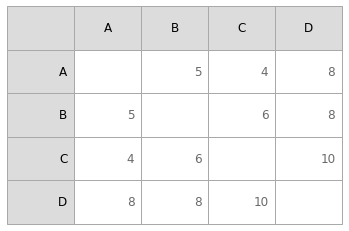

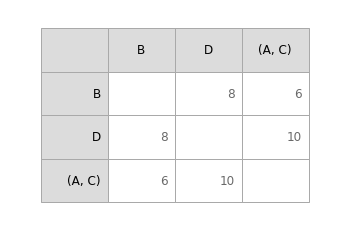

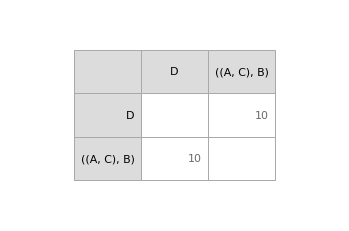

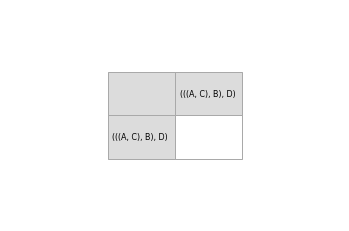


Hierarchical clustering tree: ((('A', 'C'), 'B'), 'D')


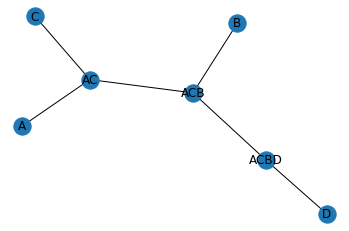

(<toyplot.canvas.Canvas at 0x7f36fbad1898>,
 <toytree.Render.ToytreeMark at 0x7f36fb9d5898>)

<svg class="toyplot-canvas-Canvas" height="275.0px" id="t6e8dbb0f5d0d484e8886858cdc661dc9" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" viewBox="0 0 255.0 275.0" width="255.0px" xmlns="http://www.w3.org/2000/svg" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink"> C A B D

In [ ]:
# Hierarchical clustering
import random
from tabulate import tabulate
import networkx as nx
import matplotlib.pyplot as plt
!pip -q install toytree
import toytree

all = list("abcd")

def label(a,b):
  """For a node (a,b) in a tree, a is less than b, so that they are ordered."""
  if str(a)<str(b): return (a,b)
  else: return (b,a)

# initialise the pairwise distances 
d = {}
for a in all:
  for b in all:
    if a<b:
      d[label(a,b)] = random.randint(1,100)

all = list("ABCD")
d = {}
d={("A","B"):5, ("A","C"):4, ("A","D"):8, ("B","C"):6, ("B","D"):8, ("C","D"):10}



# get the key of the minimal value in d
def getMin():
  return min(d.keys(), key = lambda k: d[k])

def nice(label):
  if type(label)==str: return label
  else: return nice(label[0])+nice(label[1])

def nice2(tree):
  if type(tree)==str: return tree
  else: return "(%s, %s)"%(nice2(tree[0]),nice2(tree[1]))

# print the matrix with all distances
def print_distance_matrix():
  row = [" "]+[nice2(a) for a in all]
  rows=[row]
  for a in all:
    row = [nice2(a)]
    for b in all:
      if label(a,b) in d:
        row.append(d[label(a,b)])
      else: 
        row.append("")
    rows.append(row)
  print("\n\nd=\n"+tabulate(rows, tablefmt="pretty", numalign="right"))

# print the matrix with matplotlib
def print_distance_matrix2():
  fig, ax = plt.subplots()
  columns = [" "]+[nice2(a) for a in all]
  n = len(all)
  colors = [list("w"*(n+1)) for i in range(n)]
  cell_text = [list(" "*(n+1)) for i in range(n)]
  for i in range(n):
    for j in range(n):
        if label(all[i],all[j]) in d:
          s = str(d[label(all[i],all[j])])
          cell_text[i][j+1] = s
  the_table = ax.table(cellText=cell_text,
                       cellColours=colors,
                       colLabels=columns,
                       cellLoc='right',
                       loc='center')
  for i in range(n+1): 
    for j in range(n+1):    
      the_table[i,j].set_edgecolor("#A9A9A9")
      the_table[i,j].get_text().set_color("#696969")
      the_table[i,j].set_height(0.2)
      the_table[i,j].set_width(0.2)
  # first row
  for j in range(n+1):    
    the_table[0,j].set_facecolor("#DCDCDC")
    the_table[0,j].get_text().set_color("#000000")
    the_table[0,j].loc="center"
  # first column with centered characters in black on grey background
  for i in range(n+1):    
    the_table[i,0].get_text().set_text(nice2(([("")]+all)[i]))
    the_table[i,0].loc="center"
    the_table[i,0].set_facecolor("#DCDCDC")
    the_table[i,0].get_text().set_color("#000000")

  ax.axis('tight')
  the_table.set_fontsize(12)
  ax.axis('off')
  plt.show()

# initialise the graph for visualisation
G = nx.Graph()
for a in all:
  G.add_node(a)

#print_distance_matrix()
print_distance_matrix2()

# main loop for hierarchical clustering
while len(all)>1:
  (a,b)=getMin()
  del d[(a,b)]
  all.remove(a)
  all.remove(b)
  for c in all:
    ac=d[label(a,c)]
    bc=d[label(b,c)]
    del d[label(a,c)]
    del d[label(b,c)]
    d[label((a,b),c)] = max(ac,bc)
  all.append(label(a,b))
  G.add_node(nice(label(a,b)))
  G.add_edge(nice(label(a,b)),nice(a))
  G.add_edge(nice(label(a,b)),nice(b))
  #print_distance_matrix()
  print_distance_matrix2()

print("\nHierarchical clustering tree: %s"%(str(all[0])))
plt.subplot(111)
nx.draw(G, with_labels=True)
plt.show()

# I found this nice library which plots the trees as should be ;-)
t=toytree.tree(nice2(all[0])+";")
t.draw()


#AB11 Neighbour joining

Neighbour joining is closely related to hierarchical clustering. The main while loop is more or less the same as in AB10. The key difference is how the minimum is chosen. For this NJ computes the Q matrix, which takes a global perspective on mutual distances and picks the two nodes with best Q value. The second difference to HC is that NJ sets different lengths to branches. This is captured in the variable d_a_ab e.g., which defines the distance of the node a to its new parent (a,b). You should be able to spot the formulae from the lecture. 

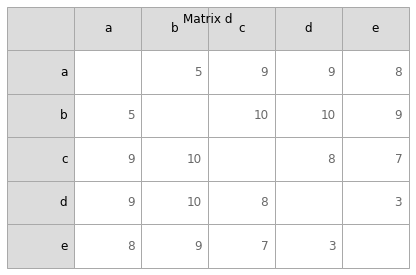

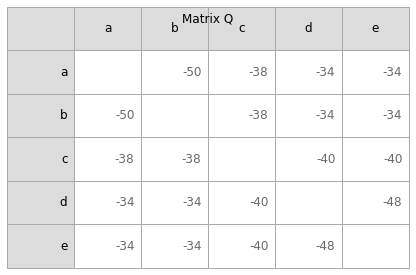

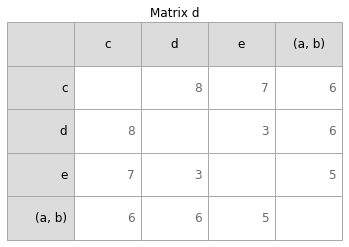

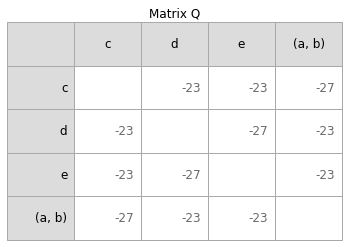

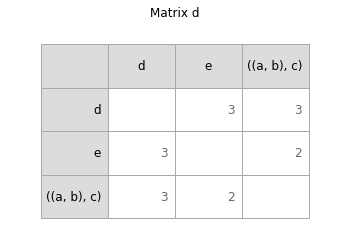

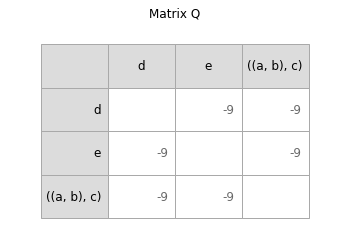

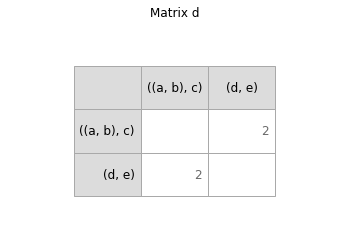

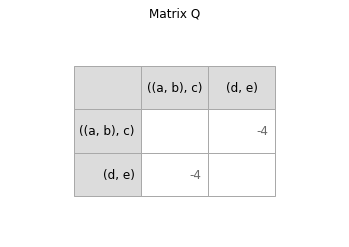


Neighbour joining tree: (('d', 'e'), (('a', 'b'), 'c'))


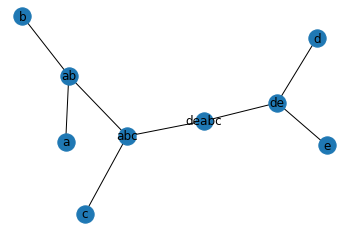

In [ ]:
# AB11 Neighbour joining

# Hierarchical clustering
import random
from tabulate import tabulate
import networkx as nx
import matplotlib.pyplot as plt

all = list("abcde") # The nodes to be clustered
d = {} # The distance matrix
Q = {} # The Q matrix

def label(a,b):
  """For a node (a,b) in a tree, a is less than b, so that they are ordered."""
  if str(a)<str(b): return (a,b)
  else: return (b,a)

# initialise the pairwise distances 
for a in all:
  for b in all:
    if a<b:
      d[label(a,b)] = random.randint(1,100)

#d = {("a","b"):5, # This is the example from the lecture
#     ("a","c"):9,
#     ("a","d"):9,
#     ("a","e"):8,
#     ("b","c"):10,
#     ("b","d"):10,
#     ("b","e"):9,
#     ("c","d"):8,
#     ("c","e"):7,
#     ("d","e"):3
#     }


def nice(label):
  if type(label)==str: return label
  else: return nice(label[0])+nice(label[1])

def nice2(tree):
  if type(tree)==str: return tree
  else: return "(%s, %s)"%(nice2(tree[0]),nice2(tree[1]))

# print the matrix with matplotlib
def print_matrix(dQ, name):
  fig, ax = plt.subplots()
  columns = [" "]+[nice2(a) for a in all]
  n = len(all)
  colors = [list("w"*(n+1)) for i in range(n)]
  cell_text = [list(" "*(n+1)) for i in range(n)]
  for i in range(n):
    for j in range(n):
        if label(all[i],all[j]) in dQ:
          cell_text[i][j+1] = str(int(dQ[label(all[i],all[j])]))
  the_table = ax.table(cellText=cell_text,
                       cellColours=colors,
                       colLabels=columns,
                       cellLoc='right',
                       loc='center')
  for i in range(n+1): 
    for j in range(n+1):    
      the_table[i,j].set_edgecolor("#A9A9A9")
      the_table[i,j].get_text().set_color("#696969")
      the_table[i,j].set_height(0.2)
      the_table[i,j].set_width(0.2)
  # first row
  for j in range(n+1):    
    the_table[0,j].set_facecolor("#DCDCDC")
    the_table[0,j].get_text().set_color("#000000")
    the_table[0,j].loc="center"
  # first column with centered characters in black on grey background
  for i in range(n+1):    
    the_table[i,0].get_text().set_text(nice2(([("")]+all)[i]))
    the_table[i,0].loc="center"
    the_table[i,0].set_facecolor("#DCDCDC")
    the_table[i,0].get_text().set_color("#000000")
  ax.axis('tight')
  plt.title("Matrix "+name)
  the_table.set_fontsize(12)
  ax.axis('off')
  plt.show()


def u(a):
  """sums up all distances from a"""
  return sum([d[label(a,b)] for b in all if label(a,b) in d])

def getQ():
  """calculates Q matrix and returns tuple (i,j) of the two nodes i and j with minimal Q value."""
  Q={}
  for a in all:
    for b in all:
      if label(a,b) in d:
        Q[label(a,b)] = (len(all)-2)*d[label(a,b)] - u(a) - u(b)
  return Q

def minQ(Q):
  return min(Q.items(), key=lambda x:x[1])[0]

# initialise the graph for visualisation
G = nx.Graph()
for a in all:
  G.add_node(a)

# main loop for hierarchical clustering
while len(all)>1:
  print_matrix(d, "d")
  Q=getQ()
  print_matrix(Q, "Q")
  (a,b)=minQ(Q)
  d_a_ab = 0.5*d[label(a,b)] + (1/(2*len(all)-2))*(u(a)-u(b))
  d_b_ab = 0.5*d[label(a,b)] + (1/(2*len(all)-2))*(u(b)-u(a))
  all.remove(a)
  all.remove(b)
  del d[(a,b)]
  for c in all:
    d[label((a,b),c)] = d[label(a,c)] - d_a_ab 
    del d[label(a,c)]
    del d[label(b,c)]
  all.append(label(a,b))
  G.add_node(nice(label(a,b)))
  G.add_edge(nice(label(a,b)),nice(a), length=d_a_ab)
  G.add_edge(nice(label(a,b)),nice(b), length=d_b_ab)

print("\nNeighbour joining tree: %s"%(str(all[0])))
plt.subplot(111)
nx.draw(G, with_labels=True)
plt.show()


#AB12 Multiple sequence alignment

The code implements progressive alignment. Given a list of strings, they are one by one aligned. The base is the Levenshtein distance and alignment function, but instead of strings alignments are compared. Overall, the code looks very similar to the basic Levenshtein, yet all of the indices may be confusing. But it works! The key is that we move from using a[i] to access a letter in string a, we now have an alignment, which is represented as a list of strings and the function get(a,i) takes this list and returns a list of the letters at position i for all of the strings in a.

In [ ]:
# AB12

# Add comments add top, set option to use subMatrix or not, change tree etc. to allow for duplicates.

def cmp(a,b):
    """Returns the score for comparing a and b, which may characters or the gap symbol.

    cmp defines the scoring scheme for the string distance."""
    if a==b and a!="-":
        return 0
    elif a=="-" or b=="-":
        return 1
    else:
        return 1.5

def sum_of_pairs(aa,bb):
    """Computes the sum of pairs of all characters in string aa against all characters in string bb.

    aa and bb are alignments and may contain the gap symbol."""
    c=0
    for a in aa:
        for b in bb:
            c+=cmp(a,b)
    return c

def min_dir(a,b,c):
    """Returns the minimum value of a, b, and c and which are minimal.

    c is encoded as NW, b as N and a as W.
    More than one can be the minimum.
    Preference is given to NW, then N, then W.
    This means that alignments with match/mismatch
    from end to front are preferred. If all alignments
    are needed, then the function has to return a set of directions
    instead of single direction."""
    if c==min(a,b,c):
        return (c,"NW")
    if b==min(a,b,c):
        return (b,"N")
    if a==min(a,b,c):
        return (a,"W")

def align(a,b,d_dir,i,j):
    """Outputs the alignment of alignments a and b up to position i and j given the direction matrix d_dir.

    Alignments a and b are lists of strings with the original character sequences possibly with gaps."""
    if i==0 and j==0:
        return [[""]*len(a),[""]*len(b)]
    elif d_dir[i,j]=="N":
        (a2,b2)=align(a,b,d_dir,i,j-1)
        return [add(a2,gap(a)),add(b2,get(b,j-1))]
    elif d_dir[i,j]=="W":
        (a2,b2)=align(a,b,d_dir,i-1,j)
        return [add(a2,get(a,i-1)), add(b2,gap(b))]
    elif d_dir[i,j]=="NW":
        (a2,b2)=align(a,b,d_dir,i-1,j-1)
        return [add(a2,get(a,i-1)), add(b2,get(b,j-1))]

def get(a,i):
    """Returns the list of characters at position i in the alignment a, which is a list of strings."""
    return [s[i] for s in a]

def add(a,aas):
    """Given a list of n strings (an alignment) and a list of n characters, add appends character i to string i.""" 
    a2=[]
    for i in range(len(a)):
        a2.append(a[i]+aas[i])
    return a2

def ins(a,b):
    """Returns the penalty for inserting/deleting into alignment a or b."""
    return len(a)*len(b)*gap

def gap(a):
    """Returns n gaps for an alignment of n sequences."""
    return ["-"]*len(a)

def lev2(a, b):
    """Align the two alignments a and b and return the common alignment and its score."""
    m = len(a[0])
    n = len(b[0])
    d = {}
    d_dir = {}
    d[(0, 0)] = 0
    d_dir[(0, 0)] = ""
    for i in range(1, m + 1):
        d[(i, 0)] = i*len(a)
        d_dir[(i, 0)] = "W"
    for j in range(1, n + 1):
        d[(0, j)] = j*len(b)
        d_dir[(0, j)] = "N"
    for i in range(1, m + 1):
        for j in range(1, n + 1):
            (d[(i, j)],d_dir[(i, j)]) = min_dir(d[(i - 1, j)] + sum_of_pairs(get(a,i-1),gap(b)),
                                            d[(i, j - 1)] + sum_of_pairs(gap(a),get(b,j-1)),
                                            d[(i - 1, j - 1)] + sum_of_pairs(get(a,i-1),get(b,j-1)))
    (a1,a2)=align(a,b,d_dir,m,n)
    a1.extend(a2)
    return (d[(m, n)], a1)
     

def msaList(a):
    """Progressive alignment of the sequences in a.

    Succesively, the sequences in a are added to an alignment.
    The final alignment is returned."""
    b=[a[0]]
    for i in range(1,len(a)):
        (score,b) = lev2(b,[a[i]])
    return (score,b)


names=["Februar","February","Febbraio","Febrero","Fevrier"]

(s,a)=msaList(names)

for aa in a:
  print(aa)


Fe-bruar-
Fe-bruary
Febbr-aio
Fe-bre-ro
Fev-rier-


#AB13 Co-evolution

We are getting to the final lab and to a very exiting one. Sofar we have covered the sequence world with its masses of data, which is set apart from the structure world, which has far less data. But current research shows that sequence may be the key to structure. In fact, multiple sequence alignments! One of the coolest results in bioinformatics is that statistical analysis of the co-evolution of residues in multiple sequence alignments holds sufficient information to predict contacts in 3D structure and that is sufficient information to fold the protein correctly. Check out https://evcouplings.org/ for this work. In this final lab we will pull all of these things together and implement a very simple co-evolution analysis, which explains the principles of these recent scientific break-throughs.

The starting point are multiple sequence alignments, which we take from PFAM. Step one: visit PFAM and select a family, which you  find interesting. Here, we chose thymidine kinases of a herpes virus. We download the aligment and filter out sequences, which are too short. Next, we turn columns in the alignment into binary vectors: 0 of the residue is the main conserved residue for this position and 1 otherwise. If we compare to of these binary vectors then matching 1's mean that both columns deviated from the conserved residue both at the same time. We count how frequently it happens. The more often the better, the more likely, that these changes are coordinated and depend on each other. We plot this in a heat map.

For comparison we plot a heat map for the real contact in a 3D structure. 

There are still some todos: The heat map of the structure uses all chains. Just use one. The color scheme is different and needs adjustment. 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


     |████████████████████████████████| 2.1MB 2.8MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 61kB 1.7MB/s 
     |████████████████████████████████| 10.4MB 6.8MB/s 
ERROR: google-colab 1.0.0 has requirement pandas~=1.0.0; python_version >= "3.0", but you'll have pandas 0.25.3 which is incompatible.



Alignment has 808 sequences.
Sequences range from 37 to 290 amino acids. Average is 235, median 274, stdev 62.56.
152 (43 percent) of the 352 columns in the alignment are conserved at more than 50 percent.



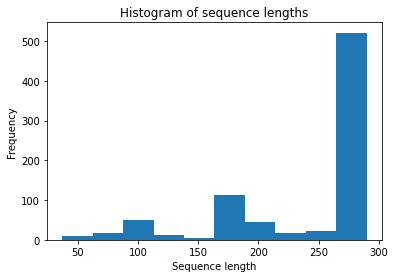


Removing sequences deviating too much from median sequence length.


Alignment has 559 sequences.
Sequences range from 217 to 290 amino acids. Average is 272, median 274, stdev 10.22.
266 (75 percent) of the 352 columns in the alignment are conserved at more than 50 percent.



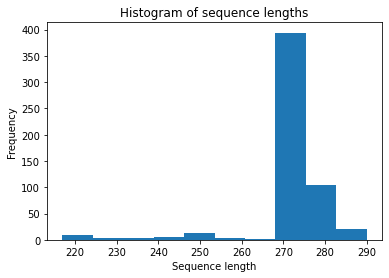

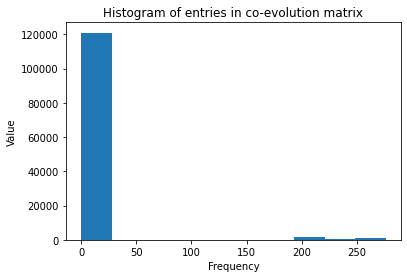


Co-evolution matrix for Pfam family PF00693


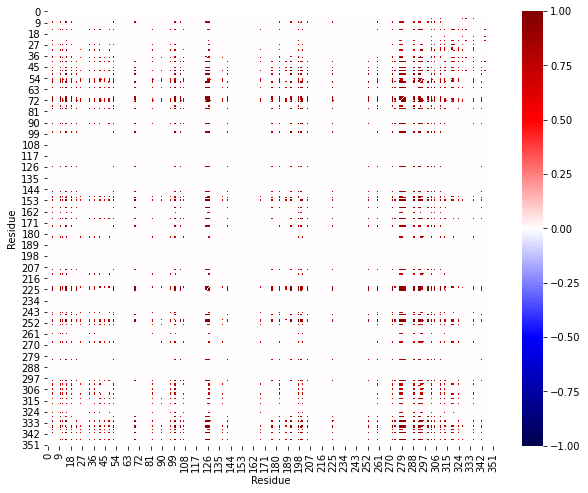

/usr/local/lib/python3.6/dist-packages/contact_map/contact_count.py:132: RuntimeWarning: The number of pixels in the figure is insufficient to show all the contacts.
 Please save this as a vector image (such as a PDF) to view the correct result.
 Another option is to increase the 'dpi' (currently: 72.0), or the 'figsize' (currently: (10.0, 8.0)).
 Recommended minimum amount of pixels = (1278, 1278) (width, height).
  warnings.warn(msg, RuntimeWarning)


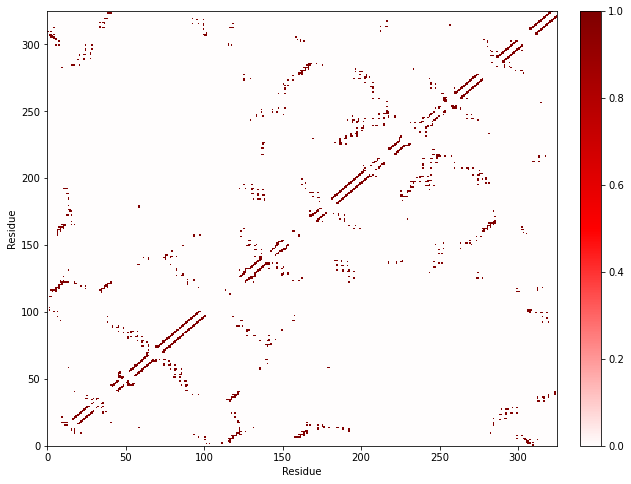

In [ ]:
#AB13

from collections import defaultdict
import seaborn as sns
import matplotlib.pyplot as plt 
import requests # to retrieve data from a url
import os.path  # to check if a file exists
import math
from statistics import median, stdev
!pip -q install mdtraj
!pip -q install contact_map
import mdtraj as md # protein structure code
from contact_map import ContactMap


pfam_id = "PF00693" # Herpes thymidine kinase
minConservation = 0.5 # Minimal conservation for a column in the multiple sequence alignment
pdb_id = "1OSN" # The structure of a herpes thymidine kinase

##########################################
#
# PFAM DATA
# 
# Our starting point is a mutliple sequence alignment from PFAM.
# Visit PFAM and identify a suitable family. 
# Here we go with herpes thymidine kinases: PF00693.
# (to learn more just search the internet for the ID and PFAM).
##
##########################################


pfam = [
"A2FX79_TRIVA/20-146       YYD-KQ-QFLQLRATLCQMSSKIKR-------------NKKISKFAEALEIIKRWAIRGDYEDHKRCLACGVLWFDQE---IAINTQQLKFLLFKCKSS-----INSTLHDSGLQPAPREAL--QKLLMERYP----YLKN--NMGEIR-KWTLRTYQP",
"A2EL50_TRIVA/14-141       ESD-QR-MYRKIQEVLSQLSTKNKR-------------NTKIDDFRELVDAIDIFENYDKESKWRRCLACGLVKFDGG---IAVNTSQLSILALRCKTS-----INTSLKGMGYTIISGNSSE-SEEFLKEIP----YISG--NPSEMR-QWTVRYLEE",
"A2DCS1_TRIVA/23-150       EAD-KQ-TYDRICAALTAPSNKNKK-------------NKRADEFREILEAISLFENHDEVDKWKRCLVCGVYQFEGG---IAVNISALKRLVFKCKSS-----INGSLKAIGYPNVTYKSST-CEELLKGIP----ILRG--NTAELR-QWTVRYQAP",
"A2F449_TRIVA/18-145       DTD-KM-TYDRIRQAITAPSNKNKK-------------NKRADEFREILEAIELYENHDQADKWKRCLVCGVFIFDKG---IAIKISALKQLIYKCKSS-----INGSLKAIGYPNVDYKSSM-CDELLNGIP----FLRG--NLVELR-QWTVRFRDR",
"A2EU97_TRIVA/13-140       ETD-KE-KYNELHQEFSSGVMKRAR-------------NGRAESFEEMLENIKKYCIRNDEDDWKRYLVCGVCWMDEA---IAINTRQLRLLVCKCKSS-----INGSLQKMGFSTNMAHSES-WKILFPKIP----LLKD--HFSELR-KWTIRYKPK",
"A2DGT4_TRIVA/24-151       PRD-KE-EYLSLKSLLDESSTKRNR-------------GHRMEAFDGILEAIHRYAERHDDDDWRRFLVCGVCWMDNM---IAINTRQLRLLISKCKSS-----INGSFQKMGYTTSQSHTES-RKFLFGKIP----LLKG--NFNELR-QWTIRSRAP",
"A2FBZ9_TRIVA/24-151       ETD-KN-SYKTLKLALDASISKRNR-------------GHRMEAFDSVLNAIHRFAERHDENDWRRFLVCGLCWMDNM---IAINTRQLRLLISKCKSS-----INGSLHKLGYTTNQSHTES-WKYLFDRIP----YLKD--NFPELR-QWTLRSRAS",
"A2DX95_TRIVA/16-143       DAD-KY-QYNCLRYSIATTASKNQR-------------NKRISTFNEAMDAIKMFAIRGDANDKLRSLVCGICWLNEG---IAINTHQLKTLLGKCKSS-----INGSLQKIGFSSNISRAET-TNAMTRFFP----FLNE--NSSELR-KWSVRNYPQ",
"A2E640_TRIVA/20-147       PID-MQ-RYNYLRLALSSSETKNQR-------------NRRIATFTEAMEAVRGFAIRGDSNDKLRCLVCGIAWLPEG---IAINTHQLKLLISRCKSS-----INGSLQKLGFTENLGRTAA-ANAMIAQYS----FLKE--NSTELR-KWSVRRKPS",
"A2DX21_TRIVA/22-149       KAD-LH-QYNCLRLALTSSESKNQR-------------NRRIATFTEAIEAVRVFAVRGDQYDRIRCLVCGIAWLPEG---LAINTHQLKLLISRCKSS-----INGSFQKLGFTEKLRRLAA-ANALISVYP----FLNE--NTSELR-KWSVRKRPA",
"A2EQ67_TRIVA/19-146       DMD-KY-HYNCLRMSISSQYSKNIR-------------NKRVENFTEIIDIIKRYCIRGQPDDWRRCLVCGVAWLHEG---IAINTRQLRLLIFKCKSS-----INGSLHKMGFTVNIGRTEA-ANALVMAIP----ILKD--NTNELR-QWTVRQTGN",
"A2FFZ1_TRIVA/19-146       DFD-KY-QYNCLRANLSANYSKNQR-------------NKRIENFTEILEIIRRFCVRGDGDDWRRFLVCGYCCFPDG---IAINTRQLKLLIFKCKSS-----INGSLHKMGLSSNIAKNEA-TNSLIMAIP----ILRD--NINEMR-QWTVRKFIK",
"A2DT03_TRIVA/19-146       DFD-KF-QYGILRVSLSTHYAKNQR-------------NKRVGNFTEILELIKRFCIRGDADDWRRCLVCGVCWLPNG---IAVNTRQLKLLIFKCKSS-----INGSLHKMGYSVNFGRAEP-TNSLVMAIP----ILKD--NINELR-QWTIRQCVG"
]

def url(id): # id e.g. "PF00693"
  """returns the url to retrieve an alignment for Pfam family."""
  return "https://pfam.xfam.org/family/"+id+"/alignment/uniprot/format?format=pfam&alnType=uniprot&order=t&case=l&gaps=dashes&download=0"

def cleanSeq(seq):
  """removes dashes from a sequence from an alignment."""
  return "".join([aa for aa in seq if aa != "-"])

def getCol(pfam, i):
  """returns the ith column from the list of aligned sequences"""
  return [p[i] for p in pfam]

def conserved(col):
  """takes a column of a multiple sequence alignment as input and 
  returns the most conserved residue if that residue is conserved in more than X percent of 
  the sequences. Otherwise it returns a dash."""
  freq = defaultdict(int)
  for c in col:
    freq[c]+=1
  (residue,count) = max(freq.items(), key=lambda x:x[1])
  if residue != "-" and count>int(minConservation*len(col)):
    return residue
  else: return "-"

def modifiedZscore(s,med,std):
  return abs(s-med)/std

def printPfamStats(pfam):
  print("\nAlignment has %d sequences."%(len(pfam)))
  seqLen = [len(cleanSeq(seq)) for seq in pfam]
  print("Sequences range from %d to %d amino acids. Average is %d, median %d, stdev %.2f."%(min(seqLen), max(seqLen), int(sum(seqLen)/len(seqLen)), median(seqLen), stdev(seqLen)))
  lenAlignment = len(pfam[0])
  noConserved = sum([1 for i in range(lenAlignment) if conserved(getCol(pfam,i))!="-" ])
  print("%d (%d percent) of the %d columns in the alignment are conserved at more than %d percent.\n"%(noConserved, int(100*noConserved/lenAlignment), lenAlignment, int(100*minConservation)))
  sns.despine()
  plt.hist(seqLen)
  plt.xlabel("Sequence length")
  plt.ylabel("Frequency")
  plt.title("Histogram of sequence lengths")
  plt.show()

def cleanPfam(pfam):
  """keeps only sequences which have the median length."""
  print("\nRemoving sequences deviating too much from median sequence length.\n")
  seqLen = [len(cleanSeq(seq)) for seq in pfam]
  med = median(seqLen)
  std = stdev(seqLen)
  return [seq for seq in pfam if modifiedZscore( len(cleanSeq(seq)), med, std) < 1]

def getPfam(id):
  """downloads or loads Pfam alignment given by id. If the alignment exists locally 
  as a file, then just load it. Otherwise get it from the internet and store it in a file
  to avoid retrieval at next run."""
  fn = id+".txt"
  if os.path.exists(fn):
    print("\n\nLoading Pfam alignment %s"%(id))
    f = open(fn)
    data = f.read()
  else:
    print("\n\nDownloading Pfam alignment %s"%(id))
    r = requests.get( url(id) ) 
    data = str(r.content, encoding = 'utf-8')
    f = open(fn, "w")
    f.write(data)
    f.close() 
  rows=[]
  for line in data.split("\n"):
    if line!="":
      seq = line.split()[1]
      rows.append(seq)
  printPfamStats(rows)
  rows = cleanPfam(rows)
  printPfamStats(rows)
  return rows

def res2bin(col,res):
  """turns a columns of an alignment into a binary vector. The residue res is the 
  conserved residue. Each entry in the column is compared to res. If the entry is equal
  to res it becomes 0 and otherwise 1."""
  return [int(res2!=res) for res2 in col]

def sizeIntersection(vec1, vec2):
  """returns the size of the intersection of vec1 and vec2."""
  return sum([1 for (i,j) in zip(vec1,vec2) if i==1 and j==1])

def align2coev(pfam):
  """compares all columns in an alinment with each other and counts how frequently both
  columns agree in terms of conserved residue or change. This is an extremely simplified
  approach to co-evolution, but you start playing from here."""
  coev = defaultdict(int)
  noCol = len(pfam[0])
  for i in range(noCol):
    for j in range(i+1, noCol):
      col_i = getCol(pfam, i)
      col_j = getCol(pfam, j)
      res_i = conserved(col_i)
      res_j = conserved(col_j)
      if res_i!="-" and res_j!="-":
        value = sizeIntersection(res2bin(col_i, res_i), res2bin(col_j, res_j))
        if value<200: value=0
        coev[(i,j)] = value
        coev[(j,i)] = value
  rows = []
  for i in range(noCol):
    row = []
    for j in range(noCol):
      if (i,j) in coev:
        row.append(coev[i,j])
      else:
        row.append(0)
    rows.append(row)
  rows.reverse()
  return rows

##########################################
#
# Main programme to compute co-evolution matrix 
# from a Pfam alignment. 
#
###########################################

# Get the Pfam alignment
pfam = getPfam(pfam_id)

# Compute the coevolution matrix from the Pfam alignment
contactMatrix = align2coev(pfam)

# Display a histogram of the values in the co-evolution matrix
values = [value for row in contactMatrix for value in row]
maxVal = max(values)
plt.hist(values)
plt.title("Histogram of entries in co-evolution matrix")
plt.xlabel("Frequency")
plt.ylabel("Value")
plt.show()

# Display the co-evolution matrix
print("\nCo-evolution matrix for Pfam family %s"%pfam_id)
plt.rcParams["figure.figsize"] = (10,8) # make it large
normalisedContactMatrix = [[val/maxVal for val in row] for row in contactMatrix]
ax = sns.heatmap(normalisedContactMatrix, cmap='seismic', vmin=-1, vmax=+1, annot=False)
plt.xlabel("Residue")
plt.ylabel("Residue")
plt.show()













##########################################
#
# Contact map from PDB
# 
# Next, we show the real contact map from a PDB file.
#
##########################################


def getPDB(id):
  """Get a PDB file"""
  fn = id+".pdb"
  if os.path.exists(fn):
    print("Loading PDB structure %s"%id)
    pdb = md.load_pdb(fn)
  else:
    print("Downloading PDB structure %s"%fn)
    pdb = md.load_pdb('https://files.rcsb.org/view/'+fn)
    pdb.save(fn)
  return pdb

def getSeq(pdb):
  """Return the sequence of the PDB file"""
  chain0 = [a.index for a in pdb.topology.chain(0).atoms]
  top = pdb.topology.subset(chain0)
  return "".join([r.code for r in top.residues if r and r.code])

def cmap(pdb):
  """Display the contact map of a PDB file using mdtraj and contactmap modules."""
  chain0 = [a.index for a in pdb.topology.chain(0).atoms]
  contacts = ContactMap(pdb[0], query=chain0) #haystack=chain0
  (fig, ax) = contacts.residue_contacts.plot(cmap='seismic', vmin=-1, vmax=1)#, figsize=(20, 20))#, dpi=454)
  plt.xlabel("Residue")
  plt.ylabel("Residue")
  plt.xlim(right=pdb.topology.chain(0).n_residues)
  plt.ylim(top=pdb.topology.chain(0).n_residues)
  plt.show()

pdb = getPDB(pdb_id)
cmap(pdb)



